In [1]:
import enchant
print(enchant.__version__)  # Print version to ensure it's imported

# Check if Dict attribute is accessible
print(dir(enchant))

3.2.2
['Broker', 'Dict', 'DictNotFoundError', 'DictWithPWL', 'Error', 'ProviderDesc', 'PyPWL', '_DOC_ERRORS', '_EnchantObject', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_broker', '_e', '_enchant', 'dict_exists', 'errors', 'get_default_language', 'get_enchant_version', 'get_param', 'get_user_config_dir', 'list_dicts', 'list_languages', 'os', 'pypwl', 'request_dict', 'request_pwl_dict', 'set_param', 'set_prefix_dir', 'utils', 'warnings']


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import re
import string
import nltk
from enchant.checker import SpellChecker

from collections import Counter
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import collections

import seaborn as sns
import joblib

from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import roc_auc_score, f1_score, recall_score, precision_score, confusion_matrix, roc_curve, auc, RocCurveDisplay, accuracy_score
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hpapa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hpapa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hpapa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hpapa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

Reading in the data

In [3]:
# reviews = pd.read_csv("Restaurant reviews.csv")
# reviews = reviews[reviews["Rating"] != "Like"]

In [4]:
# reviews.head()

Exploratory Data Analysis

In [5]:
# len(reviews["Restaurant"].unique())

In [6]:
# len(reviews["Reviewer"].unique())

In [7]:
# rating_counts = reviews.groupby("Rating").count().reset_index().sort_values(by = "Rating")
# plt.bar(x = rating_counts["Rating"], height = rating_counts["Review"])
# plt.xlabel("Rating")
# plt.ylabel("Number of Reviews")

In [8]:
# rating_counts

Classifying reviews with a rating greater than 3 as positive reviews and those with a rating lesser than or equal to 3 as negative reviews

In [9]:
# reviews["Sentiment"] = reviews["Rating"].astype(float) > 3
# reviews.loc[reviews["Sentiment"] == True, ["Sentiment"]] = "positive"
# reviews.loc[reviews["Sentiment"] == False, ["Sentiment"]] = "negative"
# reviews.drop(columns=["7514"], inplace = True)
# reviews.head()

In [10]:
# np.round(reviews["Sentiment"].value_counts() / np.sum(reviews["Sentiment"].value_counts()) * 100, 2)

In [11]:
# reviews["Sentiment"].value_counts()

### Data Preprocessing

In [12]:
# kept_stop_words = ["bad", "good", "not", "never"]

In [13]:
# # Create WordNetLemmatizer object
# wnl = WordNetLemmatizer()

# STOP_WORDS = stopwords.words()
# print(len(STOP_WORDS))
# STOP_WORDS = list(set(STOP_WORDS) - set(kept_stop_words))
# print(len(STOP_WORDS))

# checker = SpellChecker("en_US")

# # removing the emojies
# # https://www.kaggle.com/alankritamishra/covid-19-tweet-sentiment-analysis#Sentiment-analysis
# EMOJI_PATTERN = re.compile("["
#                            u"\U0001F600-\U0001F64F"  # emoticons
#                            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#                            u"\U0001F680-\U0001F6FF"  # transport & map symbols
#                            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#                            u"\U00002702-\U000027B0"
#                            u"\U000024C2-\U0001F251"
#                            "]+", flags=re.UNICODE)

# j = 0
# def cleaning(text):
#     """
#     Convert to lowercase.
#     special characters and punctuation.
#     Tokenize and remove stop words.
#     """
#     global j
#     text = str(text)
#     #  Turn the review to lower case
#     text = text.lower()
#     #  Removing the punctuation
#     text = re.sub('https?://\S+|www\.\S+', '', text)
#     text = re.sub('<.*?>+', '', text)
#     text = re.sub(r'\d+', '', text)
#     text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
#     text = re.sub('\n', '', text)
#     text = re.sub('[’“”…]', '', text)
#     text = text.replace(',', '')
#     #  Correcting any spelling mistakes
#     checker.set_text(text)
#     for error in checker:
#         suggestions = error.suggest()
#         if suggestions:
#             error.replace(suggestions[0])
#     text = checker.get_text()
#     #  Removing Emojis
#     text = EMOJI_PATTERN.sub(r'', text)
#     # Removing the stop-words
#     text_tokens = word_tokenize(text)
#     tokens_without_sw = [
#         word for word in text_tokens if not word in STOP_WORDS]
#     filtered_sentence = (" ").join(tokens_without_sw)
#     text = filtered_sentence
#     # Lemmatisation 
#     list2 = nltk.word_tokenize(text)
#     lemmas = []
#     for word, tag in pos_tag(list2):
#         wntag = tag[0].lower()
#         wntag = wntag if wntag in ['a', 'r', 'n', 'v'] else None
#         lemma = wnl.lemmatize(word, wntag) if wntag else word
#         lemmas.append(lemma)
 
#     lemmatized_string = ' '.join([words for words in lemmas])
#     if j % 100 == 0:
#         print(j)
#     j += 1


#     return lemmatized_string

In [14]:
# lens = []
# i = 0
# for review in reviews["Review"]:
#     if len(str(review)) == 95:
#         print(review)
#         print(i)
#         break
#     lens.append(len(str(review)))
#     i += 1

In [15]:
# review = i
# print(reviews["Review"].iloc[review:review+1].apply(cleaning).values)

In [16]:
# print(reviews.iloc[review]["Review"])

In [17]:
# reviews["Clean Reviews"] = reviews["Review"].apply(cleaning)

In [18]:
# reviews.to_csv("cleaned_reviews.csv")

## Reading in the cleaned data

In [4]:
reviews = pd.read_csv("cleaned_reviews.csv")
reviews.dropna(subset=["Clean Reviews"], inplace = True)
# Creating the target feature
reviews.loc[reviews["Sentiment"] == "positive", "Sentiment"] = 1
reviews.loc[reviews["Sentiment"] == "negative", "Sentiment"] = 0
reviews["Sentiment"] = reviews["Sentiment"].astype(int)

In [5]:
X = reviews["Clean Reviews"]
y = reviews["Sentiment"]

## Only unigrams

In [21]:
Tf = TfidfVectorizer(ngram_range=(1, 1))

### Random Forest

In [1]:
# Set up the Stratified K-Fold Cross Validation object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

# Set up the parameters for the grid search hyperparameter optimisation
n_estimators = [100, 500]
max_leaf_nodes_opts = [10, 100, 500]
max_features_opts = ["sqrt", None]
max_depths = [10, 20, 30, 40]
min_samples_leafs = [50, 100]

results = []

# Perform the grid search hyperparameter optimisation
for max_leaf_nodes in max_leaf_nodes_opts:
    for max_features in max_features_opts:
        for max_depth in max_depths:
                for min_samples_leaf in min_samples_leafs:
                    for n_estimator in n_estimators:
                        f1s = []
                        aucs = []
                        precisions = []
                        recalls = []
                        accuracies = []
                        CV = 0
                        params = {
                            "n_estimators": n_estimator, 
                            "max_leaf_nodes": max_leaf_nodes, 
                            "max_features": max_features,
                            "max_depth": max_depth,
                            "min_samples_leaf": min_samples_leaf
                        }
                        for train_index, test_index in skf.split(X, y):

                            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
                            
                            # Fit and transform the training data
                            X_train_tfidf = Tf.fit_transform(X_train)
                            print(X_train_tfidf.shape)

                            # Transform the testing data
                            X_test_tfidf = Tf.transform(X_test)

                            X_train_res, y_train_res = (X_train_tfidf, y_train)

                            rfc = RandomForestClassifier(
                                n_estimators = n_estimator, 
                                max_leaf_nodes = max_leaf_nodes, 
                                max_features = max_features,
                                max_depth = max_depth,
                                min_samples_leaf = min_samples_leaf,
                                random_state = 2,
                                class_weight = "balanced"
                            )

                            # Train the random forest
                            rfc.fit(X_train_res, y_train_res)
                            # Obtain the probability predictions
                            y_pred_proba = rfc.predict_proba(X_test_tfidf)
                            # Obtain the predictions
                            y_pred = (np.array([subarray[1] for subarray in y_pred_proba]) > 0.5).astype(int)

                            # Compute and store the relevant performance metrics
                            auc = np.round(roc_auc_score(y_test.values.tolist(), np.array([subarray[1] for subarray in y_pred_proba])), 4)
                            precision = np.round(precision_score(y_test, y_pred), 4)
                            recall = np.round(recall_score(y_test, y_pred), 4)
                            f1 = np.round(f1_score(y_test, y_pred), 4)
                            accuracy = np.round(accuracy_score(y_test, y_pred), 4)

                            aucs.append(auc)
                            precisions.append(precision)
                            recalls.append(recall)
                            f1s.append(f1)
                            accuracies.append(accuracy)
                            print(f"CV: {CV}/5, {params}, AUC: {auc}, Precision: {precision}, Recall: {recall}, F1: {f1}, Accuracy: {accuracy}")
                            CV += 1
                        print("\n")
                        # Store the results obtained with the specific set of parameters
                        results.append(
                            {
                                "params": params, 
                                "metrics": {
                                "auc":np.round(np.mean(aucs), 4), 
                                "precision":np.round(np.mean(precisions), 4), 
                                "recall":np.round(np.mean(recalls), 4), 
                                "f1":np.round(np.mean(f1s), 4), 
                                "accuracy": np.round(np.mean(accuracies), 4)
                            }
                        }
                    )

Obtain the set of parameters that achieve the highest AUC

In [ ]:
dictionary_with_highest_auc = max(results, key=lambda x: x['metrics']['auc'])
dictionary_with_highest_auc

{'params': {'n_estimators': 1000,
  'max_leaf_nodes': 100,
  'max_features': 'sqrt',
  'max_depth': 20,
  'min_samples_leaf': 50},
 'metrics': {'auc': 0.9171,
  'precision': 0.8996,
  'recall': 0.8673,
  'f1': 0.8831,
  'accuracy': 0.8551}}

{'params': {'n_estimators': 1000,
  'max_leaf_nodes': 100,
  'max_features': 'sqrt',
  'max_depth': 20,
  'min_samples_leaf': 50},
 'metrics': {'auc': 0.9171,
  'precision': 0.8996,
  'recall': 0.8673,
  'f1': 0.8831,
  'accuracy': 0.8551}}

Performing the threshold optimisation (i.e. finding the threshold that returns the highest F1-Score)

In [2]:
thresholds = np.arange(0.05, 0.95, 0.0125)
l = []
AUC = []
RECALL = []
PRECISION = []
ACCURACY = []
n_estimator = dictionary_with_highest_auc["params"]["n_estimators"]
max_leaf_nodes = dictionary_with_highest_auc["params"]["max_leaf_nodes"]
max_features = dictionary_with_highest_auc["params"]["max_features"]
max_depth = dictionary_with_highest_auc["params"]["max_depth"]
min_samples_leaf = dictionary_with_highest_auc["params"]["min_samples_leaf"]
for threshold in thresholds:
    f1_scores = []
    aucs = []
    precisions = []
    recalls = []
    accuracies = []
    CV = 1
    for i, (train_index, test_index) in enumerate(skf.split(X, y)):
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Fit and transform the training data
        X_train_tfidf = Tf.fit_transform(X_train)

        # Transform the testing data
        X_test_tfidf = Tf.transform(X_test)

        X_train_res, y_train_res = (X_train_tfidf, y_train)

        rfc = RandomForestClassifier(
            n_estimators = n_estimator, 
            max_leaf_nodes = max_leaf_nodes, 
            max_features = max_features,
            max_depth = max_depth,
            min_samples_leaf = min_samples_leaf,
            random_state = 2,
            class_weight = "balanced"
        )
        rfc.fit(X_train_res, y_train_res)
        y_pred_proba = rfc.predict_proba(X_test_tfidf)
        
        y_pred = (np.array([subarray[1] for subarray in y_pred_proba]) > threshold).astype(int)
        
        f1_scores.append(f1_score(y_test, y_pred))
        auc = np.round(roc_auc_score(y_test.values.tolist(), np.array([subarray[1] for subarray in y_pred_proba])), 4)
        precision = np.round(precision_score(y_test, y_pred), 4)
        recall = np.round(recall_score(y_test, y_pred), 4)
        accuracy = np.round(accuracy_score(y_test, y_pred), 4)
        
        aucs.append(auc)
        precisions.append(precision)
        recalls.append(recall)
        accuracies.append(accuracy)
        print(f"CV: {CV}/5, Threshold: {threshold}, F1: {f1_score(y_test, y_pred)}")
        CV += 1
    l.append(np.mean(f1_scores))
    AUC.append(np.mean(aucs))
    PRECISION.append(np.mean(precisions))
    RECALL.append(np.mean(recalls))
    ACCURACY.append(np.mean(accuracies))
best_threshold = thresholds[l == np.max(l)][0]
auc = np.array(AUC)[l == np.max(l)][0]
precision = np.array(PRECISION)[l == np.max(l)][0]
recall = np.array(RECALL)[l == np.max(l)][0]
accuracy = np.array(ACCURACY)[l == np.max(l)][0]
f"The best threshold is {best_threshold:0.2f}. F1: {np.max(l)}, AUC: {auc}, Precision: {precision}, Recall: {recall}, Accuracy: {accuracy}"

In [25]:
best_threshold

0.4874999999999999

Plotting the confusion and storing the each trained fold of the best model

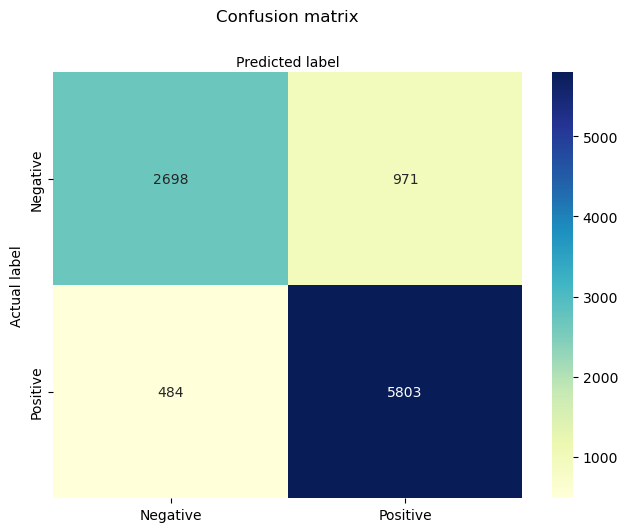

In [26]:
cnf_matrix = np.array([[0, 0], [0, 0]])
fold_counter = 0
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Fit and transform the training data
    X_train_tfidf = Tf.fit_transform(X_train)

    # Transform the testing data
    X_test_tfidf = Tf.transform(X_test)

    X_train_res, y_train_res = (X_train_tfidf, y_train)

    rfc = RandomForestClassifier(
        n_estimators = n_estimator, 
        max_leaf_nodes = max_leaf_nodes, 
        max_features = max_features,
        max_depth = max_depth,
        min_samples_leaf = min_samples_leaf,
        random_state = 2,
        class_weight = "balanced"
    )
    rfc.fit(X_train_res, y_train_res)
    y_pred_proba = rfc.predict_proba(X_test_tfidf)
    y_pred = (np.array([subarray[1] for subarray in y_pred_proba]) > best_threshold).astype(int)
    cnf_matrix += confusion_matrix(y_test, y_pred)
    # Store the model
    model_filename = f"Models/random_forest_fold_{fold_counter}.joblib"
    joblib.dump(rfc, model_filename)
    
    fold_counter += 1

class_names = ["Negative", "Positive"] #name  of classes
fig, ax = plt.subplots()
tick_marks = [0.5, 1.5]

#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## MLP With Adam Solver

In [3]:
# Set up the Stratified K-Fold Cross Validation object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

# Set up the parameters for the grid search hyperparameter optimisation
hidden_layer_sizes = [
     [10], [20],
     [10, 10], [20, 20],
     [10, 10, 10], [20, 20, 20]
]
activation_functions = ["relu", "logistic", "tanh"]
beta_1s = [0.01, 0.1]
beta_2s = [0.01, 0.1]
alphas = [0.01, 0.1]

results = []

# Perform the grid search hyperparameter optimisation
for hidden_layer_size in hidden_layer_sizes:
        for activation_function in activation_functions:
            for beta_1 in beta_1s:
                for beta_2 in beta_2s:
                    for alpha in alphas:
                        f1s = []
                        aucs = []
                        precisions = []
                        recalls = []
                        accuracies = []
                        CV = 0
                        params = {
                            "hidden layer size": hidden_layer_size, 
                            "activation function": activation_function, 
                            "beta_1": beta_1, 
                            "beta_2": beta_2, 
                            "alpha": alpha
                        }
                        for train_index, test_index in skf.split(X, y):

                            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
                            # Fit and transform the training data
                            X_train_tfidf = Tf.fit_transform(X_train)

                            # Transform the testing data
                            X_test_tfidf = Tf.transform(X_test)

                            X_train_res, y_train_res = (X_train_tfidf, y_train)

                            mlp = MLPClassifier(
                                hidden_layer_sizes=hidden_layer_size,
                                activation=activation_function,
                                beta_1=beta_1, 
                                beta_2=beta_2,
                                alpha = alpha,
                                random_state = 2, 
                                max_iter=500
                            )
                            # Train the model
                            mlp.fit(X_train_res, y_train_res)
                            # Obtain the probability predictions
                            y_pred_proba = mlp.predict_proba(X_test_tfidf)
                            # Obtain the predictions
                            y_pred = (np.array([subarray[1] for subarray in y_pred_proba]) > 0.5).astype(int)
                            # Store the relevant performance metrics
                            auc = np.round(roc_auc_score(y_test.values.tolist(), np.array([subarray[1] for subarray in y_pred_proba])), 4)
                            precision = np.round(precision_score(y_test, y_pred), 4)
                            recall = np.round(recall_score(y_test, y_pred), 4)
                            f1 = np.round(f1_score(y_test, y_pred), 4)
                            accuracy = np.round(accuracy_score(y_test, y_pred), 4)

                            aucs.append(auc)
                            precisions.append(precision)
                            recalls.append(recall)
                            f1s.append(f1)
                            accuracies.append(accuracy)
                            print(f"CV: {CV}/5, {params}, AUC: {auc}, Precision: {precision}, Recall: {recall}, F1: {f1}, Accuracy: {accuracy}")
                            CV += 1
                        print("\n")
                        # Store the results
                        results.append(
                            {
                                "params": params, 
                                "metrics": {
                                "auc":np.round(np.mean(aucs), 4), 
                                "precision":np.round(np.mean(precisions), 4), 
                                "recall":np.round(np.mean(recalls), 4), 
                                "f1":np.round(np.mean(f1s), 4), 
                                "accuracy": np.round(np.mean(accuracies), 4)
                            }
                        }
                    )

Obtain the best performing set of hyperparameters

In [23]:
dictionary_with_highest_auc = max(results, key=lambda x: x['metrics']['auc'])
dictionary_with_highest_auc

{'params': {'hidden layer size': [10],
  'activation function': 'relu',
  'beta_1': 0.1,
  'beta_2': 0.01,
  'alpha': 0.1},
 'metrics': {'auc': 0.9425,
  'precision': 0.8954,
  'recall': 0.9219,
  'f1': 0.9085,
  'accuracy': 0.8827}}

Find the threshold which optimises the F1-Score

In [24]:
thresholds = np.arange(0.05, 0.95, 0.0125)
l = []
AUC = []
RECALL = []
PRECISION = []
ACCURACY = []

hidden_layer_size = dictionary_with_highest_auc["params"]["hidden layer size"]
activation_function = dictionary_with_highest_auc["params"]["activation function"]
beta_1 = dictionary_with_highest_auc["params"]["beta_1"]
beta_2 = dictionary_with_highest_auc["params"]["beta_2"]
alpha = dictionary_with_highest_auc["params"]["alpha"]

for threshold in thresholds:
    f1_scores = []
    aucs = []
    precisions = []
    recalls = []
    accuracies = []
    CV = 1
    for i, (train_index, test_index) in enumerate(skf.split(X, y)):
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Fit and transform the training data
        X_train_tfidf = Tf.fit_transform(X_train)

        # Transform the testing data
        X_test_tfidf = Tf.transform(X_test)

        X_train_res, y_train_res = (X_train_tfidf, y_train)

        mlp = MLPClassifier(
            hidden_layer_sizes=hidden_layer_size,
            activation=activation_function,
            beta_1=beta_1, 
            beta_2=beta_2,
            alpha=alpha, 
            random_state = 2, 
            max_iter=500
        )

        mlp.fit(X_train_res, y_train_res)
        y_pred_proba = mlp.predict_proba(X_test_tfidf)
        y_pred = (np.array([subarray[1] for subarray in y_pred_proba]) > threshold).astype(int)

        auc = np.round(roc_auc_score(y_test.values.tolist(), np.array([subarray[1] for subarray in y_pred_proba])), 4)
        f1_scores.append(f1_score(y_test, y_pred))
        precision = np.round(precision_score(y_test, y_pred), 4)
        recall = np.round(recall_score(y_test, y_pred), 4)
        accuracy = np.round(accuracy_score(y_test, y_pred), 4)
        
        aucs.append(auc)
        precisions.append(precision)
        recalls.append(recall)
        accuracies.append(accuracy)
        print(f"CV: {CV}/5, Threshold: {threshold}, F1: {f1_score(y_test, y_pred)}")
        CV += 1
    l.append(np.mean(f1_scores))
    AUC.append(np.mean(aucs))
    PRECISION.append(np.mean(precisions))
    RECALL.append(np.mean(recalls))
    ACCURACY.append(np.mean(accuracies))

best_threshold = thresholds[l == np.max(l)][0]
auc = np.array(AUC)[l == np.max(l)][0]
precision = np.array(PRECISION)[l == np.max(l)][0]
recall = np.array(RECALL)[l == np.max(l)][0]
accuracy = np.array(ACCURACY)[l == np.max(l)][0]
f"The best threshold is {best_threshold:0.2f}. F1: {np.max(l)}, AUC: {auc}, Precision: {precision}, Recall: {recall}, Accuracy: {accuracy}"

CV: 1/5, Threshold: 0.05, F1: 0.8472505091649695
CV: 2/5, Threshold: 0.05, F1: 0.8499660556687034
CV: 3/5, Threshold: 0.05, F1: 0.8493894165535957
CV: 4/5, Threshold: 0.05, F1: 0.8458149779735683
CV: 5/5, Threshold: 0.05, F1: 0.8441295546558705
CV: 1/5, Threshold: 0.0625, F1: 0.8517759562841529
CV: 2/5, Threshold: 0.0625, F1: 0.8563611491108072
CV: 3/5, Threshold: 0.0625, F1: 0.8566529492455418
CV: 4/5, Threshold: 0.0625, F1: 0.8501362397820165
CV: 5/5, Threshold: 0.0625, F1: 0.852750256235053
CV: 1/5, Threshold: 0.075, F1: 0.8563554943162246
CV: 2/5, Threshold: 0.075, F1: 0.8630562262849258
CV: 3/5, Threshold: 0.075, F1: 0.8608996539792388
CV: 4/5, Threshold: 0.075, F1: 0.8575361321403993
CV: 5/5, Threshold: 0.075, F1: 0.8571428571428572
CV: 1/5, Threshold: 0.0875, F1: 0.860908775580992
CV: 2/5, Threshold: 0.0875, F1: 0.8670600485942381
CV: 3/5, Threshold: 0.0875, F1: 0.8670157068062827
CV: 4/5, Threshold: 0.0875, F1: 0.8616984402079723
CV: 5/5, Threshold: 0.0875, F1: 0.86467730742539

'The best threshold is 0.41. F1: 0.9102468583105064, AUC: 0.94246, Precision: 0.8798, Recall: 0.94292, Accuracy: 0.8825999999999998'

In [25]:
best_threshold

0.4124999999999999

Plot the confusion matrix and store each trained fold of the model with the optimised hyperparameters

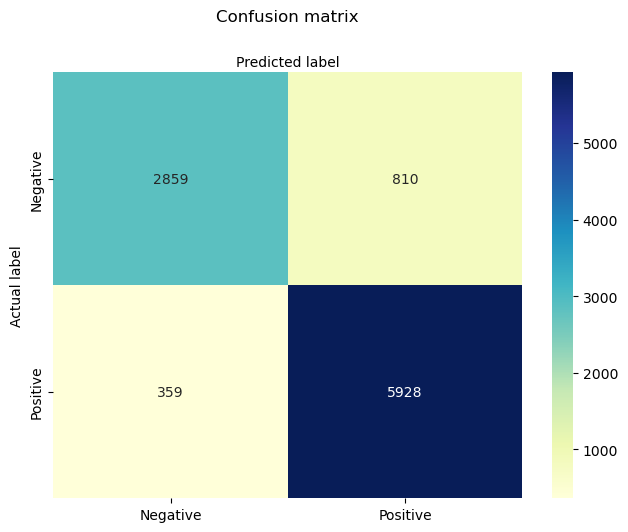

In [27]:
cnf_matrix = np.array([[0, 0], [0, 0]])
fold_counter = 0
for i, (train_index, test_index) in enumerate(skf.split(X, y)):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Fit and transform the training data
    X_train_tfidf = Tf.fit_transform(X_train)

    # Transform the testing data
    X_test_tfidf = Tf.transform(X_test)

    X_train_res, y_train_res = (X_train_tfidf, y_train)

    mlp = MLPClassifier(
        hidden_layer_sizes=hidden_layer_size,
        activation=activation_function,
        beta_1=beta_1, 
        beta_2=beta_2,
        alpha = alpha, 
        random_state = 2, 
        max_iter=500
    )

    mlp.fit(X_train_res, y_train_res)
    y_pred_proba = mlp.predict_proba(X_test_tfidf)
    y_pred = (np.array([subarray[1] for subarray in y_pred_proba]) > best_threshold).astype(int)

    cnf_matrix += confusion_matrix(y_test, y_pred)
    # Store the model
    model_filename = f"Models/mlp_fold_{fold_counter}.joblib"
    joblib.dump(mlp, model_filename)
    
    fold_counter += 1

class_names = ["Negative", "Positive"] #name  of classes
fig, ax = plt.subplots()
tick_marks = [0.5, 1.5]

#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## SVM

In [4]:
# Set up the Stratified K-Fold Cross Validation object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

# Set up the hyperparameters for the grid seach hyperpamater optimisation
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
kernels = ["poly", "rbf", "sigmoid"]
gammas = ["scale", "auto"]

results = []

# Perform the grid search hyperparameter optimisation
for C in Cs:
        for kernel in kernels:
            for gamma in gammas:
                f1s = []
                aucs = []
                precisions = []
                recalls = []
                accuracies = []
                CV = 0
                params = {
                    "C": C, 
                    "kernel": kernel, 
                    "gamma": gamma
                }
                for train_index, test_index in skf.split(X, y):

                    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

                    # Fit and transform the training data
                    X_train_tfidf = Tf.fit_transform(X_train)

                    # Transform the testing data
                    X_test_tfidf = Tf.transform(X_test)

                    X_train_res, y_train_res = (X_train_tfidf, y_train)

                    svc = SVC(
                        C = C, 
                        kernel = kernel,
                        gamma = gamma,
                        random_state = 2,
                        class_weight = "balanced"
                    )
                    # Train the model
                    svc.fit(X_train_res, y_train_res)
                    # Obtain the probability predictions
                    decision_values = svc.decision_function(X_test_tfidf)
                    y_pred_proba = 1 / (1 + (1 / (2 ** decision_values)))
                    # Obtain the predictions
                    mask = np.array(y_pred_proba) > 0.5
                    y_pred = mask.astype(int)
                    # Store the performance metrics
                    auc = np.round(roc_auc_score(y_test.values.tolist(), y_pred_proba), 4)
                    precision = np.round(precision_score(y_test, y_pred), 4)
                    recall = np.round(recall_score(y_test, y_pred), 4)
                    f1 = np.round(f1_score(y_test, y_pred), 4)
                    accuracy = np.round(accuracy_score(y_test, y_pred), 4)

                    aucs.append(auc)
                    precisions.append(precision)
                    recalls.append(recall)
                    f1s.append(f1)
                    accuracies.append(accuracy)
                    print(f"CV: {CV}/5, {params}, AUC: {auc}, Precision: {precision}, Recall: {recall}, F1: {f1}, Accuracy: {accuracy}")
                    CV += 1
                print("\n")
                # Store the results
                results.append(
                    {
                        "params": params, 
                        "metrics": {
                        "auc":np.round(np.mean(aucs), 4), 
                        "precision":np.round(np.mean(precisions), 4), 
                        "recall":np.round(np.mean(recalls), 4), 
                        "f1":np.round(np.mean(f1s), 4), 
                        "accuracy": np.round(np.mean(accuracies), 4)
                    }
                }
            )

Obtain the optimal set of hyperparameters

In [23]:
dictionary_with_highest_auc = max(results, key=lambda x: x['metrics']['auc'])
dictionary_with_highest_auc

{'params': {'C': 1, 'kernel': 'rbf', 'gamma': 'scale'},
 'metrics': {'auc': 0.9449,
  'precision': 0.9042,
  'recall': 0.9222,
  'f1': 0.9131,
  'accuracy': 0.8891}}

Obtain the threshold which returns the highest F1-Score

In [5]:
thresholds = np.arange(0.05, 0.95, 0.0125)
l = []
AUC = []
RECALL = []
PRECISION = []
ACCURACY =  []
C = dictionary_with_highest_auc["params"]["C"]
kernel = dictionary_with_highest_auc["params"]["kernel"]
gamma = dictionary_with_highest_auc["params"]["gamma"]
for threshold in thresholds:
    f1_scores = []
    aucs = []
    precisions = []
    recalls = []
    accuracies = []
    CV = 1
    for i, (train_index, test_index) in enumerate(skf.split(X, y)):
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Fit and transform the training data
        X_train_tfidf = Tf.fit_transform(X_train)

        # Transform the testing data
        X_test_tfidf = Tf.transform(X_test)

        X_train_res, y_train_res = (X_train_tfidf, y_train)

        svc = SVC(
            C = C, 
            kernel = kernel,
            gamma = gamma,
            random_state = 2,
            class_weight = "balanced"
        )

        svc.fit(X_train_res, y_train_res)
        decision_values = svc.decision_function(X_test_tfidf)
        y_pred_proba = 1 / (1 + (1 / (2 ** decision_values)))
        mask = np.array(y_pred_proba) > threshold
        y_pred = mask.astype(int)

        
        
        f1_scores.append(f1_score(y_test, y_pred))
        auc = np.round(roc_auc_score(y_test.values.tolist(), y_pred_proba), 4)
        precision = np.round(precision_score(y_test, y_pred), 4)
        recall = np.round(recall_score(y_test, y_pred), 4)
        accuracy = np.round(accuracy_score(y_test, y_pred), 4)
        
        aucs.append(auc)
        precisions.append(precision)
        recalls.append(recall)
        accuracies.append(accuracy)
        print(f"CV: {CV}/5, Threshold: {threshold}, F1: {f1_score(y_test, y_pred)}")
        CV += 1
    l.append(np.mean(f1_scores))
    AUC.append(np.mean(aucs))
    PRECISION.append(np.mean(precisions))
    RECALL.append(np.mean(recalls))
    ACCURACY.append(np.mean(accuracies))

best_threshold = thresholds[l == np.max(l)][0]
auc = np.array(AUC)[l == np.max(l)][0]
precision = np.array(PRECISION)[l == np.max(l)][0]
recall = np.array(RECALL)[l == np.max(l)][0]
accuracy = np.array(ACCURACY)[l == np.max(l)][0]

f"The best threshold is {best_threshold:0.2f}. F1: {np.max(l)}, AUC: {auc}, Precision: {precision}, Recall: {recall}, Accuracy: {accuracy}"

In [25]:
best_threshold

0.4874999999999999

Plot the confusion matrix and store the model

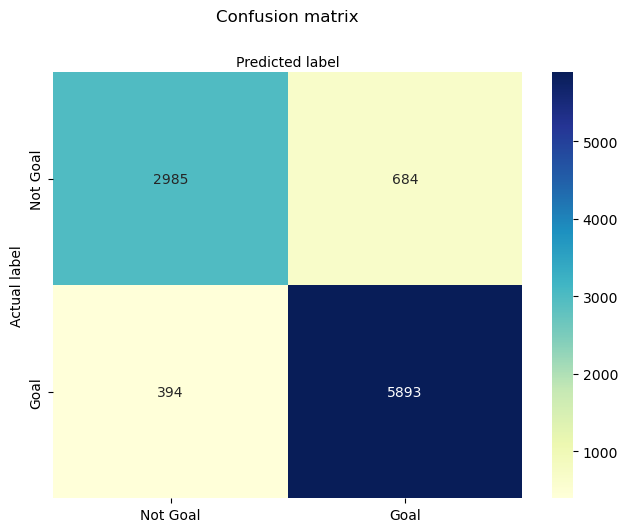

In [26]:
cnf_matrix = np.array([[0, 0], [0, 0]])
fold_counter = 0
for i, (train_index, test_index) in enumerate(skf.split(X, y)):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit and transform the training data
    X_train_tfidf = Tf.fit_transform(X_train)

    # Transform the testing data
    X_test_tfidf = Tf.transform(X_test)

    X_train_res, y_train_res = (X_train_tfidf, y_train)

    svc = SVC(
        C = C, 
        kernel = kernel,
        gamma = gamma,
        random_state = 2,
        class_weight = "balanced"
    )

    svc.fit(X_train_res, y_train_res)
    decision_values = svc.decision_function(X_test_tfidf)
    y_pred_proba = 1 / (1 + (1 / (2 ** decision_values)))
    mask = np.array(y_pred_proba) > best_threshold
    y_pred = mask.astype(int)
    cnf_matrix += confusion_matrix(y_test, y_pred)
    
    # Store the model
    model_filename = f"Models/svm_fold_{fold_counter}.joblib"
    joblib.dump(svc, model_filename)
    
    fold_counter += 1

class_names = ["Not Goal", "Goal"] #name  of classes
fig, ax = plt.subplots()
tick_marks = [0.5, 1.5]

#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## Only bigrams

In [23]:
Tf = TfidfVectorizer(ngram_range=(2, 2))

## Random Forest

In [6]:
# Setting the Stratified K-Fold Cross Validation object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

# Setting up the hyperparameter grid for the Grid Search cross validation
n_estimators = [100, 500]
max_leaf_nodes_opts = [10, 100, 500]
max_features_opts = ["sqrt", None]
max_depths = [10, 20, 30, 40]
min_samples_leafs = [50, 100]

results = []

# Performing the Grid Search cross validation
for max_leaf_nodes in max_leaf_nodes_opts:
    for max_features in max_features_opts:
        for max_depth in max_depths:
                for min_samples_leaf in min_samples_leafs:
                    for n_estimator in n_estimators:
                        f1s = []
                        aucs = []
                        precisions = []
                        recalls = []
                        accuracies = []
                        CV = 0
                        params = {
                            "n_estimators": n_estimator, 
                            "max_leaf_nodes": max_leaf_nodes, 
                            "max_features": max_features,
                            "max_depth": max_depth,
                            "min_samples_leaf": min_samples_leaf
                        }
                        for train_index, test_index in skf.split(X, y):

                            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
                            
                            # Fit and transform the training data
                            X_train_tfidf = Tf.fit_transform(X_train)

                            # Transform the testing data
                            X_test_tfidf = Tf.transform(X_test)

                            X_train_res, y_train_res = (X_train_tfidf, y_train)

                            rfc = RandomForestClassifier(
                                n_estimators = n_estimator, 
                                max_leaf_nodes = max_leaf_nodes, 
                                max_features = max_features,
                                max_depth = max_depth,
                                min_samples_leaf = min_samples_leaf,
                                random_state = 2,
                                class_weight = "balanced"
                            )
                            # Training the Model
                            rfc.fit(X_train_res, y_train_res)
                            # Obtain the probability predictions
                            y_pred_proba = rfc.predict_proba(X_test_tfidf)
                            # Obtain the predictions
                            y_pred = (np.array([subarray[1] for subarray in y_pred_proba]) > 0.5).astype(int)
                            # Store the performance metrics
                            auc = np.round(roc_auc_score(y_test.values.tolist(), np.array([subarray[1] for subarray in y_pred_proba])), 4)
                            precision = np.round(precision_score(y_test, y_pred), 4)
                            recall = np.round(recall_score(y_test, y_pred), 4)
                            f1 = np.round(f1_score(y_test, y_pred), 4)
                            accuracy = np.round(accuracy_score(y_test, y_pred), 4)
                            
                            aucs.append(auc)
                            precisions.append(precision)
                            recalls.append(recall)
                            f1s.append(f1)
                            accuracies.append(accuracy)
                            print(f"CV: {CV}/5, {params}, AUC: {auc}, Precision: {precision}, Recall: {recall}, F1: {f1}, Accuracy: {accuracy}")
                            CV += 1
                        print("\n")
                        # Store the results
                        results.append(
                            {
                                "params": params, 
                                "metrics": {
                                "auc":np.round(np.mean(aucs), 4), 
                                "precision":np.round(np.mean(precisions), 4), 
                                "recall":np.round(np.mean(recalls), 4), 
                                "f1":np.round(np.mean(f1s), 4), 
                                "accuracy": np.round(np.mean(accuracies), 4)
                            }
                        }
                    )

Obtain the best performing parameters obtained via the Grid Search

In [24]:
dictionary_with_highest_auc = max(results, key=lambda x: x['metrics']['auc'])
dictionary_with_highest_auc

{'params': {'n_estimators': 500,
  'max_leaf_nodes': 100,
  'max_features': None,
  'max_depth': 20,
  'min_samples_leaf': 50},
 'metrics': {'auc': 0.6984,
  'precision': 0.8043,
  'recall': 0.4287,
  'f1': 0.5591,
  'accuracy': 0.5733}}

In [22]:
dictionary_with_highest_auc= {'params': {'n_estimators': 500,
  'max_leaf_nodes': 100,
  'max_features': None,
  'max_depth': 20,
  'min_samples_leaf': 50},
 'metrics': {'auc': 0.6984,
  'precision': 0.8043,
  'recall': 0.4287,
  'f1': 0.5591,
  'accuracy': 0.5733}}

Obtaining the threshold which returns the optimal F1-Score

In [7]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

thresholds = np.arange(0.05, 0.95, 0.1)
l = []
AUC = []
RECALL = []
PRECISION = []
ACCURACY = []
n_estimator = dictionary_with_highest_auc["params"]["n_estimators"]
max_leaf_nodes = dictionary_with_highest_auc["params"]["max_leaf_nodes"]
max_features = dictionary_with_highest_auc["params"]["max_features"]
max_depth = dictionary_with_highest_auc["params"]["max_depth"]
min_samples_leaf = dictionary_with_highest_auc["params"]["min_samples_leaf"]
for threshold in thresholds:
    f1_scores = []
    aucs = []
    precisions = []
    recalls = []
    accuracies = []
    CV = 1
    for i, (train_index, test_index) in enumerate(skf.split(X, y)):
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Fit and transform the training data
        X_train_tfidf = Tf.fit_transform(X_train)

        # Transform the testing data
        X_test_tfidf = Tf.transform(X_test)

        X_train_res, y_train_res = (X_train_tfidf, y_train)

        rfc = RandomForestClassifier(
            n_estimators = n_estimator, 
            max_leaf_nodes = max_leaf_nodes, 
            max_features = max_features,
            max_depth = max_depth,
            min_samples_leaf = min_samples_leaf,
            random_state = 2,
            class_weight = "balanced"
        )
        rfc.fit(X_train_res, y_train_res)
        y_pred_proba = rfc.predict_proba(X_test_tfidf)
        
        y_pred = (np.array([subarray[1] for subarray in y_pred_proba]) > threshold).astype(int)
        
        f1_scores.append(f1_score(y_test, y_pred))
        auc = np.round(roc_auc_score(y_test.values.tolist(), np.array([subarray[1] for subarray in y_pred_proba])), 4)
        precision = np.round(precision_score(y_test, y_pred), 4)
        recall = np.round(recall_score(y_test, y_pred), 4)
        accuracy = np.round(accuracy_score(y_test, y_pred), 4)
        
        aucs.append(auc)
        precisions.append(precision)
        recalls.append(recall)
        accuracies.append(accuracy)
        print(f"CV: {CV}/5, Threshold: {threshold}, F1: {f1_score(y_test, y_pred)}")
        CV += 1
    l.append(np.mean(f1_scores))
    AUC.append(np.mean(aucs))
    PRECISION.append(np.mean(precisions))
    RECALL.append(np.mean(recalls))
    ACCURACY.append(np.mean(accuracies))
best_threshold = thresholds[l == np.max(l)][0]
auc = np.array(AUC)[l == np.max(l)][0]
precision = np.array(PRECISION)[l == np.max(l)][0]
recall = np.array(RECALL)[l == np.max(l)][0]
accuracy = np.array(ACCURACY)[l == np.max(l)][0]
f"The best threshold is {best_threshold:0.2f}. F1: {np.max(l)}, AUC: {auc}, Precision: {precision}, Recall: {recall}, Accuracy: {accuracy}"

In [ ]:
best_threshold

0.4874999999999999

Plot the confusion matrix and store the trained folds of the model with the optimised hyperparameters

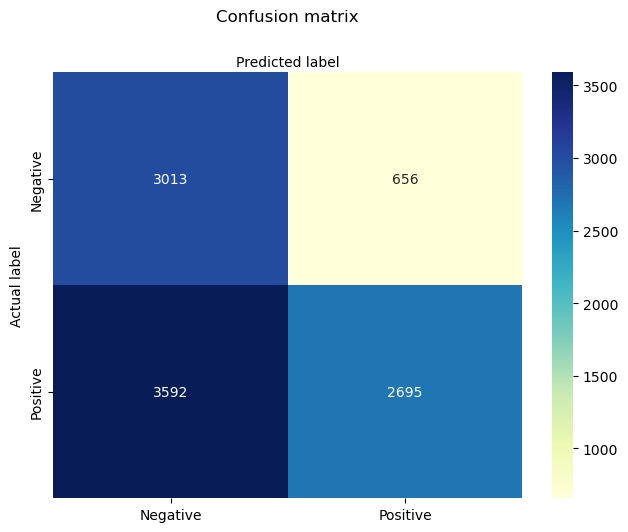

In [25]:
cnf_matrix = np.array([[0, 0], [0, 0]])
fold_counter = 0
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Fit and transform the training data
    X_train_tfidf = Tf.fit_transform(X_train)

    # Transform the testing data
    X_test_tfidf = Tf.transform(X_test)

    X_train_res, y_train_res = (X_train_tfidf, y_train)

    rfc = RandomForestClassifier(
        n_estimators = n_estimator, 
        max_leaf_nodes = max_leaf_nodes, 
        max_features = max_features,
        max_depth = max_depth,
        min_samples_leaf = min_samples_leaf,
        random_state = 2,
        class_weight = "balanced"
    )
    rfc.fit(X_train_res, y_train_res)
    y_pred_proba = rfc.predict_proba(X_test_tfidf)
    y_pred = (np.array([subarray[1] for subarray in y_pred_proba]) > 0.5).astype(int)
    cnf_matrix += confusion_matrix(y_test, y_pred)
    # Storing the model
    model_filename = f"Models/bigram_random_forest_fold_{fold_counter}.joblib"
    joblib.dump(rfc, model_filename)
    
    fold_counter += 1

class_names = ["Negative", "Positive"] #name  of classes
fig, ax = plt.subplots()
tick_marks = [0.5, 1.5]

#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## MLP With Adam Solver

In [8]:
# Setting up the Stratified K-Fold Cross Validation object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

# Setting up the hyperparameter grid for the grid search hyperparameter optimisation
hidden_layer_sizes = [
     [10]
]
activation_functions = ["relu"]
beta_1s = [0.01, 0.1]
beta_2s = [0.01, 0.1]
alphas = [0.01, 0.1]

results = []

# Performing the grid search hyperparameter optimisation
for hidden_layer_size in hidden_layer_sizes:
        for activation_function in activation_functions:
            for beta_1 in beta_1s:
                for beta_2 in beta_2s:
                    for alpha in alphas:
                        f1s = []
                        aucs = []
                        precisions = []
                        recalls = []
                        accuracies = []
                        CV = 0
                        params = {
                            "hidden layer size": hidden_layer_size, 
                            "activation function": activation_function, 
                            "beta_1": beta_1, 
                            "beta_2": beta_2, 
                            "alpha": alpha
                        }
                        for train_index, test_index in skf.split(X, y):

                            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
                            # Fit and transform the training data
                            X_train_tfidf = Tf.fit_transform(X_train)

                            # Transform the testing data
                            X_test_tfidf = Tf.transform(X_test)

                            X_train_res, y_train_res = (X_train_tfidf, y_train)

                            mlp = MLPClassifier(
                                hidden_layer_sizes=hidden_layer_size,
                                activation=activation_function,
                                beta_1=beta_1, 
                                beta_2=beta_2,
                                alpha = alpha,
                                random_state = 2, 
                                max_iter=500
                            )
                            # Training the model
                            mlp.fit(X_train_res, y_train_res)
                            # Obtain the probability predictions
                            y_pred_proba = mlp.predict_proba(X_test_tfidf)
                            # Obtain the predictions
                            y_pred = (np.array([subarray[1] for subarray in y_pred_proba]) > 0.5).astype(int)
                            # Store the performance metrics
                            auc = np.round(roc_auc_score(y_test.values.tolist(), np.array([subarray[1] for subarray in y_pred_proba])), 4)
                            precision = np.round(precision_score(y_test, y_pred), 4)
                            recall = np.round(recall_score(y_test, y_pred), 4)
                            f1 = np.round(f1_score(y_test, y_pred), 4)
                            accuracy = np.round(accuracy_score(y_test, y_pred), 4)

                            aucs.append(auc)
                            precisions.append(precision)
                            recalls.append(recall)
                            f1s.append(f1)
                            accuracies.append(accuracy)
                            print(f"CV: {CV}/5, {params}, AUC: {auc}, Precision: {precision}, Recall: {recall}, F1: {f1}, Accuracy: {accuracy}")
                            CV += 1
                        print("\n")
                        # Store the results
                        results.append(
                            {
                                "params": params, 
                                "metrics": {
                                "auc":np.round(np.mean(aucs), 4), 
                                "precision":np.round(np.mean(precisions), 4), 
                                "recall":np.round(np.mean(recalls), 4), 
                                "f1":np.round(np.mean(f1s), 4), 
                                "accuracy": np.round(np.mean(accuracies), 4)
                            }
                        }
                    )

Obtain the optimised hyperparameters set

In [24]:
dictionary_with_highest_auc = max(results, key=lambda x: x['metrics']['auc'])
dictionary_with_highest_auc

{'params': {'hidden layer size': [10],
  'activation function': 'relu',
  'beta_1': 0.1,
  'beta_2': 0.01,
  'alpha': 0.01},
 'metrics': {'auc': 0.8615,
  'precision': 0.7835,
  'recall': 0.9434,
  'f1': 0.856,
  'accuracy': 0.7996}}

Obtaining the threshold which returns the best F1-Score

In [9]:
thresholds = np.arange(0.05, 0.95, 0.1)
l = []
AUC = []
RECALL = []
PRECISION = []
ACCURACY = []

hidden_layer_size = dictionary_with_highest_auc["params"]["hidden layer size"]
activation_function = dictionary_with_highest_auc["params"]["activation function"]
beta_1 = dictionary_with_highest_auc["params"]["beta_1"]
beta_2 = dictionary_with_highest_auc["params"]["beta_2"]
alpha = dictionary_with_highest_auc["params"]["alpha"]

for threshold in thresholds:
    f1_scores = []
    aucs = []
    precisions = []
    recalls = []
    accuracies = []
    CV = 1
    for i, (train_index, test_index) in enumerate(skf.split(X, y)):
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Fit and transform the training data
        X_train_tfidf = Tf.fit_transform(X_train)

        # Transform the testing data
        X_test_tfidf = Tf.transform(X_test)

        X_train_res, y_train_res = (X_train_tfidf, y_train)

        mlp = MLPClassifier(
            hidden_layer_sizes=hidden_layer_size,
            activation=activation_function,
            beta_1=beta_1, 
            beta_2=beta_2,
            alpha=alpha, 
            random_state = 2, 
            max_iter=500
        )

        mlp.fit(X_train_res, y_train_res)
        y_pred_proba = mlp.predict_proba(X_test_tfidf)
        y_pred = (np.array([subarray[1] for subarray in y_pred_proba]) > threshold).astype(int)

        auc = np.round(roc_auc_score(y_test.values.tolist(), np.array([subarray[1] for subarray in y_pred_proba])), 4)
        f1_scores.append(f1_score(y_test, y_pred))
        precision = np.round(precision_score(y_test, y_pred), 4)
        recall = np.round(recall_score(y_test, y_pred), 4)
        accuracy = np.round(accuracy_score(y_test, y_pred), 4)
        
        aucs.append(auc)
        precisions.append(precision)
        recalls.append(recall)
        accuracies.append(accuracy)
        print(f"CV: {CV}/5, Threshold: {threshold}, F1: {f1_score(y_test, y_pred)}")
        CV += 1
    l.append(np.mean(f1_scores))
    AUC.append(np.mean(aucs))
    PRECISION.append(np.mean(precisions))
    RECALL.append(np.mean(recalls))
    ACCURACY.append(np.mean(accuracies))

best_threshold = thresholds[l == np.max(l)][0]
auc = np.array(AUC)[l == np.max(l)][0]
precision = np.array(PRECISION)[l == np.max(l)][0]
recall = np.array(RECALL)[l == np.max(l)][0]
accuracy = np.array(ACCURACY)[l == np.max(l)][0]
f"The best threshold is {best_threshold:0.2f}. F1: {np.max(l)}, AUC: {auc}, Precision: {precision}, Recall: {recall}, Accuracy: {accuracy}"

In [10]:
best_threshold

In [28]:
best_threshold = 0.5

Plotting the confusion matrix and storing the trained folds of the model with optimsied hyperparameters

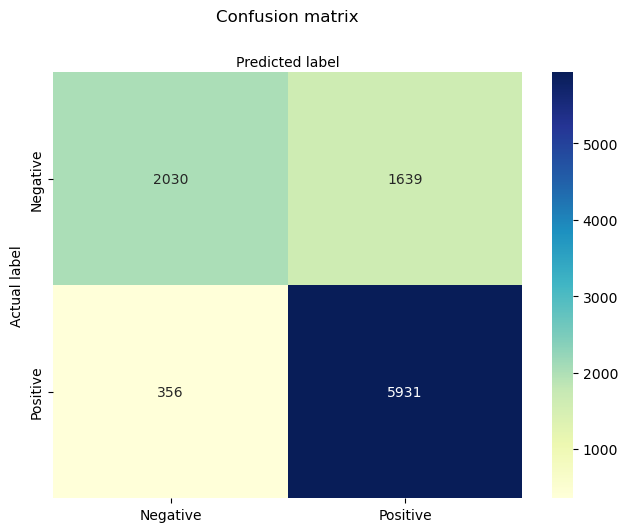

In [29]:
cnf_matrix = np.array([[0, 0], [0, 0]])
fold_counter = 0
for i, (train_index, test_index) in enumerate(skf.split(X, y)):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Fit and transform the training data
    X_train_tfidf = Tf.fit_transform(X_train)

    # Transform the testing data
    X_test_tfidf = Tf.transform(X_test)

    X_train_res, y_train_res = (X_train_tfidf, y_train)

    mlp = MLPClassifier(
        hidden_layer_sizes=hidden_layer_size,
        activation=activation_function,
        beta_1=beta_1, 
        beta_2=beta_2,
        alpha = alpha, 
        random_state = 2, 
        max_iter=500
    )

    mlp.fit(X_train_res, y_train_res)
    y_pred_proba = mlp.predict_proba(X_test_tfidf)
    y_pred = (np.array([subarray[1] for subarray in y_pred_proba]) > best_threshold).astype(int)

    cnf_matrix += confusion_matrix(y_test, y_pred)
    # Store the model
    model_filename = f"Models/bigrams_mlp_fold_{fold_counter}.joblib"
    joblib.dump(mlp, model_filename)
    
    fold_counter += 1

class_names = ["Negative", "Positive"] #name  of classes
fig, ax = plt.subplots()
tick_marks = [0.5, 1.5]

#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## SVM

In [11]:
# Setting up the Stratified K-Fold Cross Validation object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

# Setting up the hyperparameter grid for the grid search hyperparameter optimisation
Cs = [0.001, 0.01, 0.1, 1, 10, 100]
kernels = ["poly", "rbf", "sigmoid"]
gammas = ["scale", "auto"]

results = []

# Perform the grid search hyperparameter optimisation
for C in Cs:
        for kernel in kernels:
            for gamma in gammas:
                f1s = []
                aucs = []
                precisions = []
                recalls = []
                accuracies = []
                CV = 0
                params = {
                    "C": C, 
                    "kernel": kernel, 
                    "gamma": gamma
                }
                for train_index, test_index in skf.split(X, y):

                    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

                    # Fit and transform the training data
                    X_train_tfidf = Tf.fit_transform(X_train)

                    # Transform the testing data
                    X_test_tfidf = Tf.transform(X_test)

                    X_train_res, y_train_res = (X_train_tfidf, y_train)

                    svc = SVC(
                        C = C, 
                        kernel = kernel,
                        gamma = gamma,
                        random_state = 2,
                        class_weight = "balanced"
                    )
                    # Train the model
                    svc.fit(X_train_res, y_train_res)
                    # Obtain the probability predictions
                    decision_values = svc.decision_function(X_test_tfidf)
                    y_pred_proba = 1 / (1 + (1 / (2 ** decision_values)))
                    # Obtain the predictions
                    mask = np.array(y_pred_proba) > 0.5
                    y_pred = mask.astype(int)
                    # Store the performance metrics
                    auc = np.round(roc_auc_score(y_test.values.tolist(), y_pred_proba), 4)
                    precision = np.round(precision_score(y_test, y_pred), 4)
                    recall = np.round(recall_score(y_test, y_pred), 4)
                    f1 = np.round(f1_score(y_test, y_pred), 4)
                    accuracy = np.round(accuracy_score(y_test, y_pred), 4)

                    aucs.append(auc)
                    precisions.append(precision)
                    recalls.append(recall)
                    f1s.append(f1)
                    accuracies.append(accuracy)
                    print(f"CV: {CV}/5, {params}, AUC: {auc}, Precision: {precision}, Recall: {recall}, F1: {f1}, Accuracy: {accuracy}")
                    CV += 1
                print("\n")
                # Store the results
                results.append(
                    {
                        "params": params, 
                        "metrics": {
                        "auc":np.round(np.mean(aucs), 4), 
                        "precision":np.round(np.mean(precisions), 4), 
                        "recall":np.round(np.mean(recalls), 4), 
                        "f1":np.round(np.mean(f1s), 4), 
                        "accuracy": np.round(np.mean(accuracies), 4)
                    }
                }
            )

Obtain the set of optimised hyperparameters

In [25]:
dictionary_with_highest_auc = max(results, key=lambda x: x['metrics']['auc'])
dictionary_with_highest_auc

{'params': {'C': 1, 'kernel': 'sigmoid', 'gamma': 'scale'},
 'metrics': {'auc': 0.8993,
  'precision': 0.8457,
  'recall': 0.9136,
  'f1': 0.8783,
  'accuracy': 0.8402}}

Obtain the threshold which maximises the F1-Score

In [12]:
thresholds = np.arange(0.05, 0.95, 0.025)
l = []
AUC = []
RECALL = []
PRECISION = []
ACCURACY =  []
C = dictionary_with_highest_auc["params"]["C"]
kernel = dictionary_with_highest_auc["params"]["kernel"]
gamma = dictionary_with_highest_auc["params"]["gamma"]
for threshold in thresholds:
    f1_scores = []
    aucs = []
    precisions = []
    recalls = []
    accuracies = []
    CV = 1
    for i, (train_index, test_index) in enumerate(skf.split(X, y)):
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Fit and transform the training data
        X_train_tfidf = Tf.fit_transform(X_train)

        # Transform the testing data
        X_test_tfidf = Tf.transform(X_test)

        X_train_res, y_train_res = (X_train_tfidf, y_train)

        svc = SVC(
            C = C, 
            kernel = kernel,
            gamma = gamma,
            random_state = 2,
            class_weight = "balanced"
        )

        svc.fit(X_train_res, y_train_res)
        decision_values = svc.decision_function(X_test_tfidf)
        y_pred_proba = 1 / (1 + (1 / (2 ** decision_values)))
        mask = np.array(y_pred_proba) > threshold
        y_pred = mask.astype(int)

        
        
        f1_scores.append(f1_score(y_test, y_pred))
        auc = np.round(roc_auc_score(y_test.values.tolist(), y_pred_proba), 4)
        precision = np.round(precision_score(y_test, y_pred), 4)
        recall = np.round(recall_score(y_test, y_pred), 4)
        accuracy = np.round(accuracy_score(y_test, y_pred), 4)
        
        aucs.append(auc)
        precisions.append(precision)
        recalls.append(recall)
        accuracies.append(accuracy)
        print(f"CV: {CV}/5, Threshold: {threshold}, F1: {f1_score(y_test, y_pred)}")
        CV += 1
    l.append(np.mean(f1_scores))
    AUC.append(np.mean(aucs))
    PRECISION.append(np.mean(precisions))
    RECALL.append(np.mean(recalls))
    ACCURACY.append(np.mean(accuracies))

best_threshold = thresholds[l == np.max(l)][0]
auc = np.array(AUC)[l == np.max(l)][0]
precision = np.array(PRECISION)[l == np.max(l)][0]
recall = np.array(RECALL)[l == np.max(l)][0]
accuracy = np.array(ACCURACY)[l == np.max(l)][0]

f"The best threshold is {best_threshold:0.2f}. F1: {np.max(l)}, AUC: {auc}, Precision: {precision}, Recall: {recall}, Accuracy: {accuracy}"

In [27]:
best_threshold

0.47500000000000014

Plot the confusion matrix and store the trained folds of the model with the optimised hyperparameters

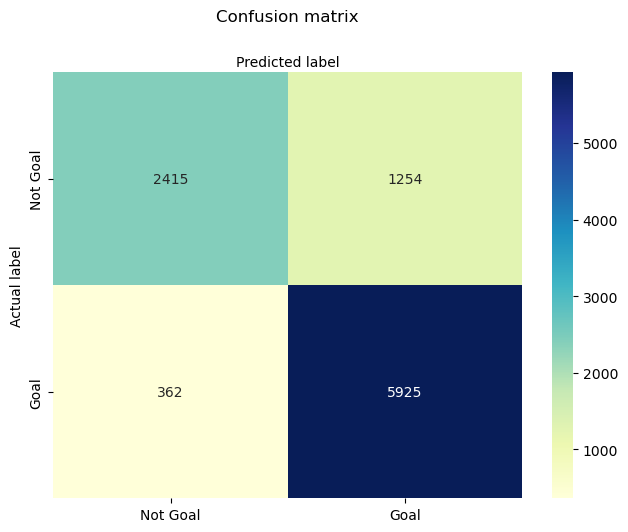

In [28]:
cnf_matrix = np.array([[0, 0], [0, 0]])
fold_counter = 0
for i, (train_index, test_index) in enumerate(skf.split(X, y)):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit and transform the training data
    X_train_tfidf = Tf.fit_transform(X_train)

    # Transform the testing data
    X_test_tfidf = Tf.transform(X_test)

    X_train_res, y_train_res = (X_train_tfidf, y_train)

    svc = SVC(
        C = C, 
        kernel = kernel,
        gamma = gamma,
        random_state = 2,
        class_weight = "balanced"
    )

    svc.fit(X_train_res, y_train_res)
    decision_values = svc.decision_function(X_test_tfidf)
    y_pred_proba = 1 / (1 + (1 / (2 ** decision_values)))
    mask = np.array(y_pred_proba) > best_threshold
    y_pred = mask.astype(int)
    cnf_matrix += confusion_matrix(y_test, y_pred)
    # Store the model
    model_filename = f"Models/bigram_svm_fold_{fold_counter}.joblib"
    joblib.dump(svc, model_filename)
    
    fold_counter += 1

class_names = ["Not Goal", "Goal"] #name  of classes
fig, ax = plt.subplots()
tick_marks = [0.5, 1.5]

#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## Unigrams and Bigrams

In [23]:
Tf = TfidfVectorizer(ngram_range=(1, 2))

## Random Forest

In [13]:
# Create the Stratified K-Fold Cross Validation object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
# Setting up the hyperparameters for the grid search hyperparameter optimisation
n_estimators = [500, 100]
max_leaf_nodes_opts = [500, 100, 10]
max_features_opts = ["sqrt", None]
max_depths = [40, 30, 20]
min_samples_leafs = [50, 100]

results = []
# Performing the Grid Search hyperparameter optimisation
for max_leaf_nodes in max_leaf_nodes_opts:
    for max_features in max_features_opts:
        for max_depth in max_depths:
                for min_samples_leaf in min_samples_leafs:
                    for n_estimator in n_estimators:
                        f1s = []
                        aucs = []
                        precisions = []
                        recalls = []
                        accuracies = []
                        CV = 0
                        params = {
                            "n_estimators": n_estimator, 
                            "max_leaf_nodes": max_leaf_nodes, 
                            "max_features": max_features,
                            "max_depth": max_depth,
                            "min_samples_leaf": min_samples_leaf
                        }
                        for train_index, test_index in skf.split(X, y):

                            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
                            
                            # Fit and transform the training data
                            X_train_tfidf = Tf.fit_transform(X_train)

                            # Transform the testing data
                            X_test_tfidf = Tf.transform(X_test)

                            X_train_res, y_train_res = (X_train_tfidf, y_train)
  
                            rfc = RandomForestClassifier(
                                n_estimators = n_estimator, 
                                max_leaf_nodes = max_leaf_nodes, 
                                max_features = max_features,
                                max_depth = max_depth,
                                min_samples_leaf = min_samples_leaf,
                                random_state = 2,
                                class_weight = "balanced"
                            )
                            # Train the model
                            rfc.fit(X_train_res, y_train_res)
                            # Obtain the probability predictions
                            y_pred_proba = rfc.predict_proba(X_test_tfidf)
                            # Obtain the predictions
                            y_pred = (np.array([subarray[1] for subarray in y_pred_proba]) > 0.5).astype(int)
                            # Store the performance metrics
                            auc = np.round(roc_auc_score(y_test.values.tolist(), np.array([subarray[1] for subarray in y_pred_proba])), 4)
                            precision = np.round(precision_score(y_test, y_pred), 4)
                            recall = np.round(recall_score(y_test, y_pred), 4)
                            f1 = np.round(f1_score(y_test, y_pred), 4)
                            accuracy = np.round(accuracy_score(y_test, y_pred), 4)

                            aucs.append(auc)
                            precisions.append(precision)
                            recalls.append(recall)
                            f1s.append(f1)
                            accuracies.append(accuracy)
                            print(f"CV: {CV}/5, {params}, AUC: {auc}, Precision: {precision}, Recall: {recall}, F1: {f1}, Accuracy: {accuracy}")
                            CV += 1
                        print("\n")
                        # Store the results
                        results.append(
                            {
                                "params": params, 
                                "metrics": {
                                "auc":np.round(np.mean(aucs), 4), 
                                "precision":np.round(np.mean(precisions), 4), 
                                "recall":np.round(np.mean(recalls), 4), 
                                "f1":np.round(np.mean(f1s), 4), 
                                "accuracy": np.round(np.mean(accuracies), 4)
                            }
                        }
                    )

Obtain the set of optimised hyperparameters

In [24]:
dictionary_with_highest_auc = max(results, key=lambda x: x['metrics']['auc'])
dictionary_with_highest_auc

{'params': {'n_estimators': 500,
  'max_leaf_nodes': 500,
  'max_features': 'sqrt',
  'max_depth': 40,
  'min_samples_leaf': 50},
 'metrics': {'auc': 0.8962,
  'precision': 0.8864,
  'recall': 0.8573,
  'f1': 0.8716,
  'accuracy': 0.8405}}

In [25]:

dictionary_with_highest_auc = {'params': {'n_estimators': 500,
  'max_leaf_nodes': 500,
  'max_features': 'sqrt',
  'max_depth': 40,
  'min_samples_leaf': 50},
 'metrics': {'auc': 0.8962,
  'precision': 0.8864,
  'recall': 0.8573,
  'f1': 0.8716,
  'accuracy': 0.8405}}

Obtain the threshold that maximises that F1-Score

In [14]:
thresholds = np.arange(0.05, 0.95, 0.05)
l = []
AUC = []
RECALL = []
PRECISION = []
ACCURACY = []
n_estimator = dictionary_with_highest_auc["params"]["n_estimators"]
max_leaf_nodes = dictionary_with_highest_auc["params"]["max_leaf_nodes"]
max_features = dictionary_with_highest_auc["params"]["max_features"]
max_depth = dictionary_with_highest_auc["params"]["max_depth"]
min_samples_leaf = dictionary_with_highest_auc["params"]["min_samples_leaf"]
for threshold in thresholds:
    f1_scores = []
    aucs = []
    precisions = []
    recalls = []
    accuracies = []
    CV = 1
    for i, (train_index, test_index) in enumerate(skf.split(X, y)):
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Fit and transform the training data
        X_train_tfidf = Tf.fit_transform(X_train)

        # Transform the testing data
        X_test_tfidf = Tf.transform(X_test)

        X_train_res, y_train_res = (X_train_tfidf, y_train)

        rfc = RandomForestClassifier(
            n_estimators = n_estimator, 
            max_leaf_nodes = max_leaf_nodes, 
            max_features = max_features,
            max_depth = max_depth,
            min_samples_leaf = min_samples_leaf,
            random_state = 2,
            class_weight = "balanced"
        )
        rfc.fit(X_train_res, y_train_res)
        y_pred_proba = rfc.predict_proba(X_test_tfidf)
        
        y_pred = (np.array([subarray[1] for subarray in y_pred_proba]) > threshold).astype(int)
        
        f1_scores.append(f1_score(y_test, y_pred))
        auc = np.round(roc_auc_score(y_test.values.tolist(), np.array([subarray[1] for subarray in y_pred_proba])), 4)
        precision = np.round(precision_score(y_test, y_pred), 4)
        recall = np.round(recall_score(y_test, y_pred), 4)
        accuracy = np.round(accuracy_score(y_test, y_pred), 4)
        
        aucs.append(auc)
        precisions.append(precision)
        recalls.append(recall)
        accuracies.append(accuracy)
        print(f"CV: {CV}/5, Threshold: {threshold}, F1: {f1_score(y_test, y_pred)}")
        CV += 1
    l.append(np.mean(f1_scores))
    AUC.append(np.mean(aucs))
    PRECISION.append(np.mean(precisions))
    RECALL.append(np.mean(recalls))
    ACCURACY.append(np.mean(accuracies))
best_threshold = thresholds[l == np.max(l)][0]
auc = np.array(AUC)[l == np.max(l)][0]
precision = np.array(PRECISION)[l == np.max(l)][0]
recall = np.array(RECALL)[l == np.max(l)][0]
accuracy = np.array(ACCURACY)[l == np.max(l)][0]
f"The best threshold is {best_threshold:0.2f}. F1: {np.max(l)}, AUC: {auc}, Precision: {precision}, Recall: {recall}, Accuracy: {accuracy}"

In [27]:
best_threshold

0.5

Plotting the confusion matrix and storing the trained folds of the model with the optimised hyperparameters

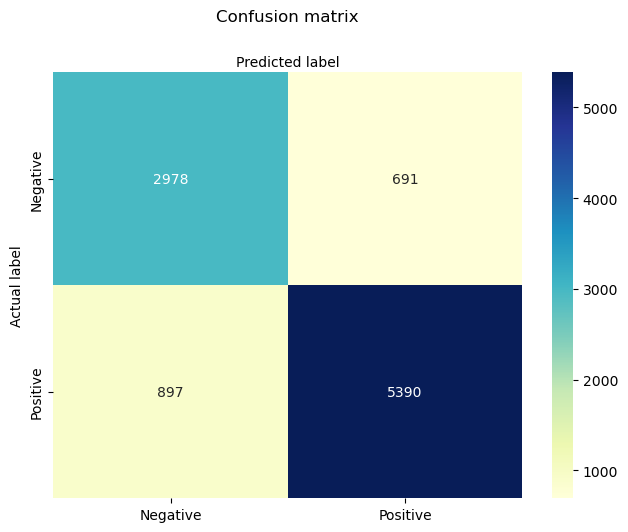

In [28]:
cnf_matrix = np.array([[0, 0], [0, 0]])
fold_counter = 0
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Fit and transform the training data
    X_train_tfidf = Tf.fit_transform(X_train)

    # Transform the testing data
    X_test_tfidf = Tf.transform(X_test)

    X_train_res, y_train_res = (X_train_tfidf, y_train)

    rfc = RandomForestClassifier(
        n_estimators = n_estimator, 
        max_leaf_nodes = max_leaf_nodes, 
        max_features = max_features,
        max_depth = max_depth,
        min_samples_leaf = min_samples_leaf,
        random_state = 2,
        class_weight = "balanced"
    )
    rfc.fit(X_train_res, y_train_res)
    y_pred_proba = rfc.predict_proba(X_test_tfidf)
    y_pred = (np.array([subarray[1] for subarray in y_pred_proba]) > best_threshold).astype(int)
    cnf_matrix += confusion_matrix(y_test, y_pred)
    # Store the model
    model_filename = f"Models/uni_bigrams_random_forest_fold_{fold_counter}.joblib"
    joblib.dump(rfc, model_filename)
    
    fold_counter += 1

class_names = ["Negative", "Positive"] #name  of classes
fig, ax = plt.subplots()
tick_marks = [0.5, 1.5]

#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## MLP With Adam Solver

In [15]:
# Setting the Stratified K-Fold Cross Validation object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

# Setting up the hyperparameter grid for the grid search hyperparameter optimisation
hidden_layer_sizes = [
     [10]
]
activation_functions = ["relu"]
beta_1s = [0.01, 0.1]
beta_2s = [0.01, 0.1]
alphas = [0.01, 0.1]

results = []
# Performing the Grid Search hyperparameter optimisation
for hidden_layer_size in hidden_layer_sizes:
        for activation_function in activation_functions:
            for beta_1 in beta_1s:
                for beta_2 in beta_2s:
                    for alpha in alphas:
                        f1s = []
                        aucs = []
                        precisions = []
                        recalls = []
                        accuracies = []
                        CV = 0
                        params = {
                            "hidden layer size": hidden_layer_size, 
                            "activation function": activation_function, 
                            "beta_1": beta_1, 
                            "beta_2": beta_2, 
                            "alpha": alpha
                        }
                        for train_index, test_index in skf.split(X, y):

                            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
                            # Fit and transform the training data
                            X_train_tfidf = Tf.fit_transform(X_train)

                            # Transform the testing data
                            X_test_tfidf = Tf.transform(X_test)

                            X_train_res, y_train_res = (X_train_tfidf, y_train)

                            mlp = MLPClassifier(
                                hidden_layer_sizes=hidden_layer_size,
                                activation=activation_function,
                                beta_1=beta_1, 
                                beta_2=beta_2,
                                alpha = alpha,
                                random_state = 2, 
                                max_iter=500
                            )
                            # Train the model
                            mlp.fit(X_train_res, y_train_res)
                            # Obtain the probability predictions
                            y_pred_proba = mlp.predict_proba(X_test_tfidf)
                            # Obtain the predictions
                            y_pred = (np.array([subarray[1] for subarray in y_pred_proba]) > 0.5).astype(int)
                            # Store the performance metrics
                            auc = np.round(roc_auc_score(y_test.values.tolist(), np.array([subarray[1] for subarray in y_pred_proba])), 4)
                            precision = np.round(precision_score(y_test, y_pred), 4)
                            recall = np.round(recall_score(y_test, y_pred), 4)
                            f1 = np.round(f1_score(y_test, y_pred), 4)
                            accuracy = np.round(accuracy_score(y_test, y_pred), 4)

                            aucs.append(auc)
                            precisions.append(precision)
                            recalls.append(recall)
                            f1s.append(f1)
                            accuracies.append(accuracy)
                            print(f"CV: {CV}/5, {params}, AUC: {auc}, Precision: {precision}, Recall: {recall}, F1: {f1}, Accuracy: {accuracy}")
                            CV += 1
                        print("\n")
                        # Store the results
                        results.append(
                            {
                                "params": params, 
                                "metrics": {
                                "auc":np.round(np.mean(aucs), 4), 
                                "precision":np.round(np.mean(precisions), 4), 
                                "recall":np.round(np.mean(recalls), 4), 
                                "f1":np.round(np.mean(f1s), 4), 
                                "accuracy": np.round(np.mean(accuracies), 4)
                            }
                        }
                    )

Obtain the set of optimised hyperparameters

In [23]:
dictionary_with_highest_auc = max(results, key=lambda x: x['metrics']['auc'])
dictionary_with_highest_auc

{'params': {'hidden layer size': [10],
  'activation function': 'relu',
  'beta_1': 0.1,
  'beta_2': 0.01,
  'alpha': 0.1},
 'metrics': {'auc': 0.9436,
  'precision': 0.8941,
  'recall': 0.9291,
  'f1': 0.9112,
  'accuracy': 0.8857}}

In [22]:
dictionary_with_highest_auc = {'params': {'hidden layer size': [10],
  'activation function': 'relu',
  'beta_1': 0.1,
  'beta_2': 0.01,
  'alpha': 0.1},
 'metrics': {'auc': 0.9436,
  'precision': 0.8941,
  'recall': 0.9291,
  'f1': 0.9112,
  'accuracy': 0.8857}}

In [16]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
thresholds = np.arange(0.05, 0.95, 0.05)
l = []
AUC = []
RECALL = []
PRECISION = []
ACCURACY = []

hidden_layer_size = dictionary_with_highest_auc["params"]["hidden layer size"]
activation_function = dictionary_with_highest_auc["params"]["activation function"]
beta_1 = dictionary_with_highest_auc["params"]["beta_1"]
beta_2 = dictionary_with_highest_auc["params"]["beta_2"]
alpha = dictionary_with_highest_auc["params"]["alpha"]

for threshold in thresholds:
    f1_scores = []
    aucs = []
    precisions = []
    recalls = []
    accuracies = []
    CV = 1
    for i, (train_index, test_index) in enumerate(skf.split(X, y)):
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Fit and transform the training data
        X_train_tfidf = Tf.fit_transform(X_train)

        # Transform the testing data
        X_test_tfidf = Tf.transform(X_test)

        X_train_res, y_train_res = (X_train_tfidf, y_train)

        mlp = MLPClassifier(
            hidden_layer_sizes=hidden_layer_size,
            activation=activation_function,
            beta_1=beta_1, 
            beta_2=beta_2,
            alpha=alpha, 
            random_state = 2, 
            max_iter=500
        )

        mlp.fit(X_train_res, y_train_res)
        y_pred_proba = mlp.predict_proba(X_test_tfidf)
        y_pred = (np.array([subarray[1] for subarray in y_pred_proba]) > threshold).astype(int)

        auc = np.round(roc_auc_score(y_test.values.tolist(), np.array([subarray[1] for subarray in y_pred_proba])), 4)
        f1_scores.append(f1_score(y_test, y_pred))
        precision = np.round(precision_score(y_test, y_pred), 4)
        recall = np.round(recall_score(y_test, y_pred), 4)
        accuracy = np.round(accuracy_score(y_test, y_pred), 4)
        
        aucs.append(auc)
        precisions.append(precision)
        recalls.append(recall)
        accuracies.append(accuracy)
        print(f"CV: {CV}/5, Threshold: {threshold}, F1: {f1_score(y_test, y_pred)}")
        CV += 1
    l.append(np.mean(f1_scores))
    AUC.append(np.mean(aucs))
    PRECISION.append(np.mean(precisions))
    RECALL.append(np.mean(recalls))
    ACCURACY.append(np.mean(accuracies))

best_threshold = thresholds[l == np.max(l)][0]
auc = np.array(AUC)[l == np.max(l)][0]
precision = np.array(PRECISION)[l == np.max(l)][0]
recall = np.array(RECALL)[l == np.max(l)][0]
accuracy = np.array(ACCURACY)[l == np.max(l)][0]
f"The best threshold is {best_threshold:0.2f}. F1: {np.max(l)}, AUC: {auc}, Precision: {precision}, Recall: {recall}, Accuracy: {accuracy}"

In [25]:
best_threshold

0.4

Plot the confusion matrix and store the trained folds of the model with the optimised hyperparameters

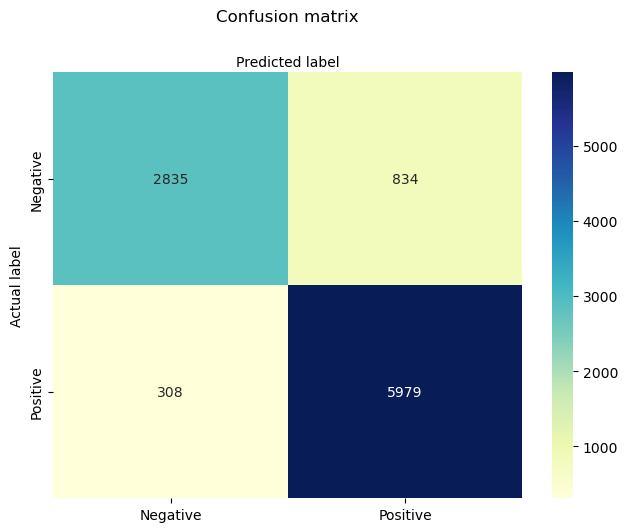

In [26]:
cnf_matrix = np.array([[0, 0], [0, 0]])
fold_counter = 0
for i, (train_index, test_index) in enumerate(skf.split(X, y)):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Fit and transform the training data
    X_train_tfidf = Tf.fit_transform(X_train)

    # Transform the testing data
    X_test_tfidf = Tf.transform(X_test)

    X_train_res, y_train_res = (X_train_tfidf, y_train)

    mlp = MLPClassifier(
        hidden_layer_sizes=hidden_layer_size,
        activation=activation_function,
        beta_1=beta_1, 
        beta_2=beta_2,
        alpha = alpha, 
        random_state = 2, 
        max_iter=500
    )

    mlp.fit(X_train_res, y_train_res)
    y_pred_proba = mlp.predict_proba(X_test_tfidf)
    y_pred = (np.array([subarray[1] for subarray in y_pred_proba]) > best_threshold).astype(int)

    cnf_matrix += confusion_matrix(y_test, y_pred)
    # Store the model
    model_filename = f"Models/uni_bigrams_mlp_fold_{fold_counter}.joblib"
    joblib.dump(mlp, model_filename)
    
    fold_counter += 1

class_names = ["Negative", "Positive"] #name  of classes
fig, ax = plt.subplots()
tick_marks = [0.5, 1.5]

#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## SVM

In [19]:
# Store the Stratified K-Fold object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

# Hyperparameter Grid
Cs = [0.001, 0.01, 0.1, 1, 10, 100]
kernels = ["poly", "rbf", "sigmoid"]
gammas = ["scale", "auto"]

results = []

# Perform the grid seach hyperparamter optimisation
for C in Cs:
        for kernel in kernels:
            for gamma in gammas:
                f1s = []
                aucs = []
                precisions = []
                recalls = []
                accuracies = []
                CV = 0
                params = {
                    "C": C, 
                    "kernel": kernel, 
                    "gamma": gamma
                }
                for train_index, test_index in skf.split(X, y):

                    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

                    # Fit and transform the training data
                    X_train_tfidf = Tf.fit_transform(X_train)

                    # Transform the testing data
                    X_test_tfidf = Tf.transform(X_test)

                    X_train_res, y_train_res = (X_train_tfidf, y_train)

                    svc = SVC(
                        C = C, 
                        kernel = kernel,
                        gamma = gamma,
                        random_state = 2,
                        class_weight = "balanced"
                    )
                    # Train the model
                    svc.fit(X_train_res, y_train_res)
                    # Obtain the probability predictions
                    decision_values = svc.decision_function(X_test_tfidf)
                    y_pred_proba = 1 / (1 + (1 / (2 ** decision_values)))
                    # Obtain the predictions
                    mask = np.array(y_pred_proba) > 0.5
                    y_pred = mask.astype(int)
                    # Store the performance metrics
                    auc = np.round(roc_auc_score(y_test.values.tolist(), y_pred_proba), 4)
                    precision = np.round(precision_score(y_test, y_pred), 4)
                    recall = np.round(recall_score(y_test, y_pred), 4)
                    f1 = np.round(f1_score(y_test, y_pred), 4)
                    accuracy = np.round(accuracy_score(y_test, y_pred), 4)

                    aucs.append(auc)
                    precisions.append(precision)
                    recalls.append(recall)
                    f1s.append(f1)
                    accuracies.append(accuracy)
                    print(f"CV: {CV}/5, {params}, AUC: {auc}, Precision: {precision}, Recall: {recall}, F1: {f1}, Accuracy: {accuracy}")
                    CV += 1
                print("\n")
                # Store the results
                results.append(
                    {
                        "params": params, 
                        "metrics": {
                        "auc":np.round(np.mean(aucs), 4), 
                        "precision":np.round(np.mean(precisions), 4), 
                        "recall":np.round(np.mean(recalls), 4), 
                        "f1":np.round(np.mean(f1s), 4), 
                        "accuracy": np.round(np.mean(accuracies), 4)
                    }
                }
            )

Obtained the set of optimised hyperparameters

In [25]:
dictionary_with_highest_auc = max(results, key=lambda x: x['metrics']['auc'])
dictionary_with_highest_auc

{'params': {'C': 10, 'kernel': 'rbf', 'gamma': 'scale'},
 'metrics': {'auc': 0.9452,
  'precision': 0.887,
  'recall': 0.9461,
  'f1': 0.9156,
  'accuracy': 0.8898}}

Obtain the threshold which maximimses the F1-Score

In [20]:
thresholds = np.arange(0.05, 0.95, 0.05)
l = []
AUC = []
RECALL = []
PRECISION = []
ACCURACY =  []
C = dictionary_with_highest_auc["params"]["C"]
kernel = dictionary_with_highest_auc["params"]["kernel"]
gamma = dictionary_with_highest_auc["params"]["gamma"]
for threshold in thresholds:
    f1_scores = []
    aucs = []
    precisions = []
    recalls = []
    accuracies = []
    CV = 1
    for i, (train_index, test_index) in enumerate(skf.split(X, y)):
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Fit and transform the training data
        X_train_tfidf = Tf.fit_transform(X_train)

        # Transform the testing data
        X_test_tfidf = Tf.transform(X_test)

        X_train_res, y_train_res = (X_train_tfidf, y_train)

        svc = SVC(
            C = C, 
            kernel = kernel,
            gamma = gamma,
            random_state = 2,
            class_weight = "balanced"
        )

        svc.fit(X_train_res, y_train_res)
        decision_values = svc.decision_function(X_test_tfidf)
        y_pred_proba = 1 / (1 + (1 / (2 ** decision_values)))
        mask = np.array(y_pred_proba) > threshold
        y_pred = mask.astype(int)

        
        
        f1_scores.append(f1_score(y_test, y_pred))
        auc = np.round(roc_auc_score(y_test.values.tolist(), y_pred_proba), 4)
        precision = np.round(precision_score(y_test, y_pred), 4)
        recall = np.round(recall_score(y_test, y_pred), 4)
        accuracy = np.round(accuracy_score(y_test, y_pred), 4)
        
        aucs.append(auc)
        precisions.append(precision)
        recalls.append(recall)
        accuracies.append(accuracy)
        print(f"CV: {CV}/5, Threshold: {threshold}, F1: {f1_score(y_test, y_pred)}")
        CV += 1
    l.append(np.mean(f1_scores))
    AUC.append(np.mean(aucs))
    PRECISION.append(np.mean(precisions))
    RECALL.append(np.mean(recalls))
    ACCURACY.append(np.mean(accuracies))

best_threshold = thresholds[l == np.max(l)][0]
auc = np.array(AUC)[l == np.max(l)][0]
precision = np.array(PRECISION)[l == np.max(l)][0]
recall = np.array(RECALL)[l == np.max(l)][0]
accuracy = np.array(ACCURACY)[l == np.max(l)][0]

f"The best threshold is {best_threshold:0.2f}. F1: {np.max(l)}, AUC: {auc}, Precision: {precision}, Recall: {recall}, Accuracy: {accuracy}"

In [27]:
best_threshold

0.5

Plotting the confusion matrix and storing the trained folds of the model with the optimised hyperparameters

In [22]:
cnf_matrix = np.array([[0, 0], [0, 0]])
fold_counter = 0
for i, (train_index, test_index) in enumerate(skf.split(X, y)):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit and transform the training data
    X_train_tfidf = Tf.fit_transform(X_train)

    # Transform the testing data
    X_test_tfidf = Tf.transform(X_test)

    X_train_res, y_train_res = (X_train_tfidf, y_train)

    svc = SVC(
        C = C, 
        kernel = kernel,
        gamma = gamma,
        random_state = 2,
        class_weight = "balanced"
    )

    svc.fit(X_train_res, y_train_res)
    decision_values = svc.decision_function(X_test_tfidf)
    y_pred_proba = 1 / (1 + (1 / (2 ** decision_values)))
    mask = np.array(y_pred_proba) > best_threshold
    y_pred = mask.astype(int)
    cnf_matrix += confusion_matrix(y_test, y_pred)
    # Store the model
    model_filename = f"Models/uni_bigrams_svm_fold_{fold_counter}.joblib"
    joblib.dump(svc, model_filename)
    
    fold_counter += 1

class_names = ["Not Goal", "Goal"] #name  of classes
fig, ax = plt.subplots()
tick_marks = [0.5, 1.5]

#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## Model Comparison

Plotting the ROC Curves and displaying the performance metrics for the hyperparameter optimised models obtained previously

### Unigram

#### Random Forest

F1 Score: 0.8885912243013365
AUC Score: 0.917109374347539
Precision Score: 0.8566800616128466
Recall Score: 0.9230159121637431

Standard Devations:
F1 Score: 0.0018952759615366264
AUC Score: 0.006008437615758164
Precision Score: 0.0025047137781623484
Recall Score: 0.00638942790481228


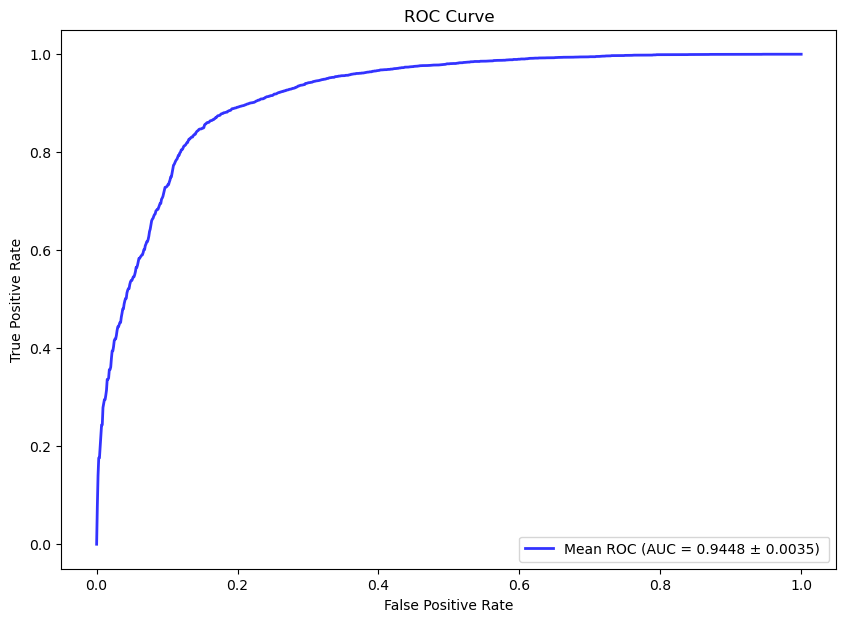

In [30]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
Tf = TfidfVectorizer(ngram_range=(1, 1))
f1_scores = []
random_forest_uni_aucs = []
precisions = []
recalls = []
tprs = []
fprs = []

all_probabilities = np.empty(len(X))
all_preds = np.empty(len(X))

random_forest_uni_mean_fpr = np.linspace(0, 1, 1000)
random_forest_uni_mean_tpr = 0.0

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    
    model = joblib.load(f"Models/random_forest_fold_{i}.joblib")
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit and transform the training data
    X_train_tfidf = Tf.fit_transform(X_train)

    # Transform the testing data
    X_test_tfidf = Tf.transform(X_test)

    X_train_res, y_train_res = (X_train_tfidf, y_train)

    y_pred_proba = model.predict_proba(X_test_tfidf)
    y_pred = (np.array([subarray[1] for subarray in y_pred_proba]) > 0.4875).astype(int)

    auc = roc_auc_score(y_test.values.tolist(), np.array([subarray[1] for subarray in y_pred_proba]))
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    random_forest_uni_aucs.append(auc)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    fpr, tpr, thresholds = roc_curve(y_test,  np.array([subarray[1] for subarray in y_pred_proba]))
    random_forest_uni_mean_tpr += np.interp(random_forest_uni_mean_fpr, fpr, tpr)
    random_forest_uni_mean_tpr[0] = 0.0
    fprs.append(fpr)
    tprs.append(tpr)
    all_probabilities[test_index] = np.array([subarray[1] for subarray in y_pred_proba])
    all_preds[test_index] = y_pred


random_forest_uni_mean_tpr /= skf.get_n_splits(X, y)

print(f"F1 Score: {np.mean(f1_scores)}")
print(f"AUC Score: {np.mean(random_forest_uni_aucs)}")
print(f"Precision Score: {np.mean(precisions)}")
print(f"Recall Score: {np.mean(recalls)}")

print("\nStandard Devations:")
print(f"F1 Score: {np.std(f1_scores)}")
print(f"AUC Score: {np.std(random_forest_uni_aucs)}")
print(f"Precision Score: {np.std(precisions)}")
print(f"Recall Score: {np.std(recalls)}")

plt.figure(figsize=(10, 7))
plt.plot(random_forest_uni_mean_fpr, random_forest_uni_mean_tpr, color='b', label=f'Mean ROC (AUC = {np.round(np.mean(random_forest_uni_aucs), 4)} ± {np.round(np.std(random_forest_uni_aucs), 4)}) ', lw=2, alpha=0.8)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

#### MLP

F1 Score: 0.9102468583105064
AUC Score: 0.9424715436887088
Precision Score: 0.8798029402966954
Recall Score: 0.9428980855065371

Standard Devations:
F1 Score: 0.0021487298584229124
AUC Score: 0.0034278676251811467
Precision Score: 0.0031952066152447505
Recall Score: 0.004594297430235674


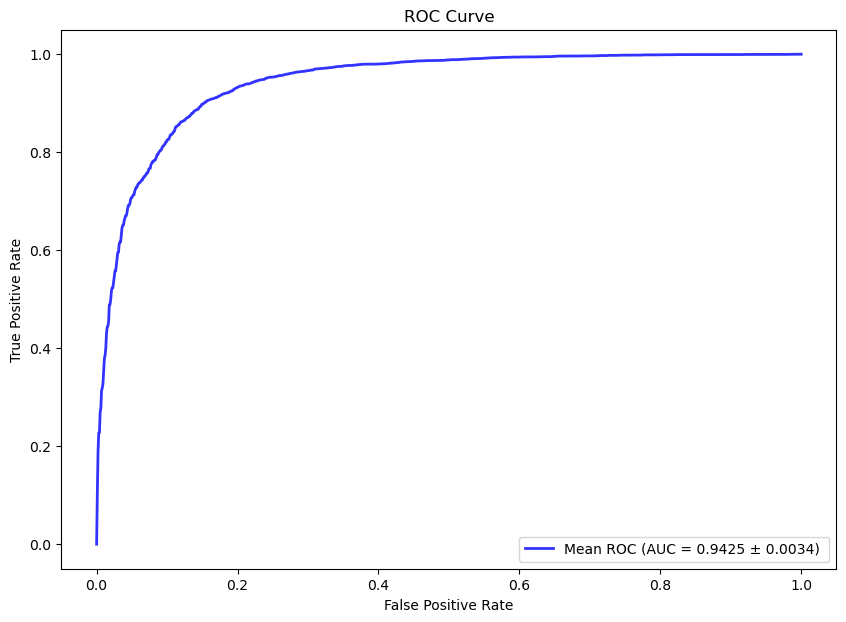

In [31]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
Tf = TfidfVectorizer(ngram_range=(1, 1))
f1_scores = []
mlp_uni_aucs_aucs = []
precisions = []
recalls = []
tprs = []
fprs = []

all_probabilities = np.empty(len(X))
all_preds = np.empty(len(X))

mlp_uni_mean_fpr = np.linspace(0, 1, 1000)
mlp_uni_mean_tpr = 0.0

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    
    model = joblib.load(f"Models/mlp_fold_{i}.joblib")
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit and transform the training data
    X_train_tfidf = Tf.fit_transform(X_train)

    # Transform the testing data
    X_test_tfidf = Tf.transform(X_test)

    X_train_res, y_train_res = (X_train_tfidf, y_train)

    y_pred_proba = model.predict_proba(X_test_tfidf)
    y_pred = (np.array([subarray[1] for subarray in y_pred_proba]) > 0.4125).astype(int)

    auc = roc_auc_score(y_test.values.tolist(), np.array([subarray[1] for subarray in y_pred_proba]))
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    mlp_uni_aucs_aucs.append(auc)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    fpr, tpr, thresholds = roc_curve(y_test,  np.array([subarray[1] for subarray in y_pred_proba]))
    mlp_uni_mean_tpr += np.interp(mlp_uni_mean_fpr, fpr, tpr)
    mlp_uni_mean_tpr[0] = 0.0
    fprs.append(fpr)
    tprs.append(tpr)
    all_probabilities[test_index] = np.array([subarray[1] for subarray in y_pred_proba])
    all_preds[test_index] = y_pred


mlp_uni_mean_tpr /= skf.get_n_splits(X, y)

print(f"F1 Score: {np.mean(f1_scores)}")
print(f"AUC Score: {np.mean(mlp_uni_aucs_aucs)}")
print(f"Precision Score: {np.mean(precisions)}")
print(f"Recall Score: {np.mean(recalls)}")

print("\nStandard Devations:")
print(f"F1 Score: {np.std(f1_scores)}")
print(f"AUC Score: {np.std(mlp_uni_aucs_aucs)}")
print(f"Precision Score: {np.std(precisions)}")
print(f"Recall Score: {np.std(recalls)}")

plt.figure(figsize=(10, 7))
plt.plot(mlp_uni_mean_fpr, mlp_uni_mean_tpr, color='b', label=f'Mean ROC (AUC = {np.round(np.mean(mlp_uni_aucs_aucs), 4)} ± {np.round(np.std(mlp_uni_aucs_aucs), 4)}) ', lw=2, alpha=0.8)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

#### SVM

F1 Score: 0.9161919871949393
AUC Score: 0.9448344746277104
Precision Score: 0.896020591237507
Recall Score: 0.9373328122450684

Standard Devations:
F1 Score: 0.0032731216688060504
AUC Score: 0.003547119933604531
Precision Score: 0.003493252962018553
Recall Score: 0.00685100624428894


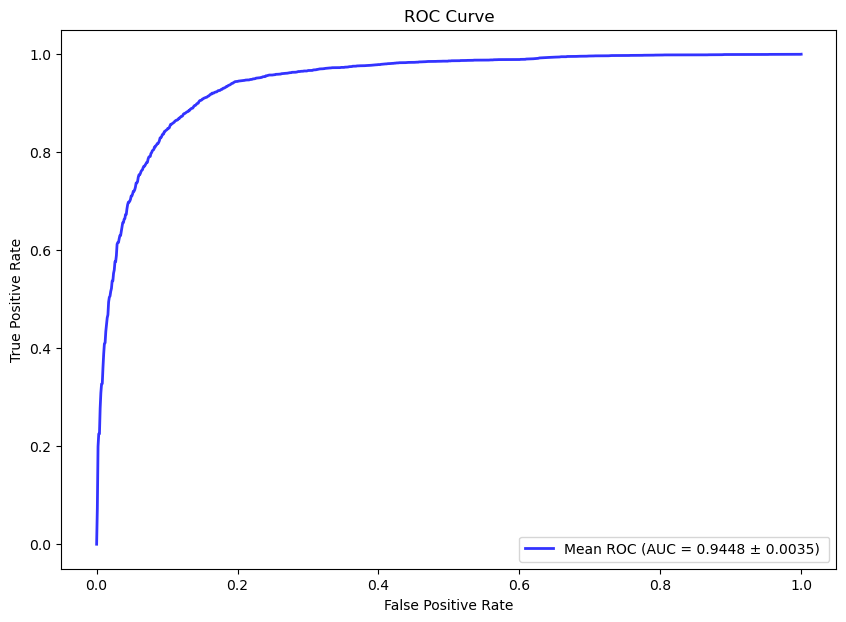

In [32]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
Tf = TfidfVectorizer(ngram_range=(1, 1))
f1_scores = []
svm_uni_aucs = []
precisions = []
recalls = []
tprs = []
fprs = []

all_probabilities = np.empty(len(X))
all_preds = np.empty(len(X))

svm_uni_mean_fpr = np.linspace(0, 1, 1000)
svm_uni_mean_tpr = 0.0

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    
    model = joblib.load(f"Models/svm_fold_{i}.joblib")
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit and transform the training data
    X_train_tfidf = Tf.fit_transform(X_train)

    # Transform the testing data
    X_test_tfidf = Tf.transform(X_test)

    X_train_res, y_train_res = (X_train_tfidf, y_train)

    decision_values = model.decision_function(X_test_tfidf)
    y_pred_proba = 1 / (1 + (1 / (2 ** decision_values)))
    mask = np.array(y_pred_proba) > 0.4875
    y_pred = mask.astype(int)

    auc = roc_auc_score(y_test.values.tolist(), y_pred_proba)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    svm_uni_aucs.append(auc)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    svm_uni_mean_tpr += np.interp(svm_uni_mean_fpr, fpr, tpr)
    svm_uni_mean_tpr[0] = 0.0
    fprs.append(fpr)
    tprs.append(tpr)
    all_probabilities[test_index] = y_pred_proba
    all_preds[test_index] = y_pred


svm_uni_mean_tpr /= skf.get_n_splits(X, y)

print(f"F1 Score: {np.mean(f1_scores)}")
print(f"AUC Score: {np.mean(svm_uni_aucs)}")
print(f"Precision Score: {np.mean(precisions)}")
print(f"Recall Score: {np.mean(recalls)}")

print("\nStandard Devations:")
print(f"F1 Score: {np.std(f1_scores)}")
print(f"AUC Score: {np.std(svm_uni_aucs)}")
print(f"Precision Score: {np.std(precisions)}")
print(f"Recall Score: {np.std(recalls)}")

plt.figure(figsize=(10, 7))
plt.plot(svm_uni_mean_fpr, svm_uni_mean_tpr, color='b', label=f'Mean ROC (AUC = {np.round(np.mean(svm_uni_aucs), 4)} ± {np.round(np.std(svm_uni_aucs), 4)}) ', lw=2, alpha=0.8)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Bigram

#### Random Forest

F1 Score: 0.5590934014518405
AUC Score: 0.6984080080878232
Precision Score: 0.8043153979708979
Recall Score: 0.42865998105363545

Standard Devations:
F1 Score: 0.015412048872579492
AUC Score: 0.00902920432328578
Precision Score: 0.014354004005033111
Recall Score: 0.01636359860224812


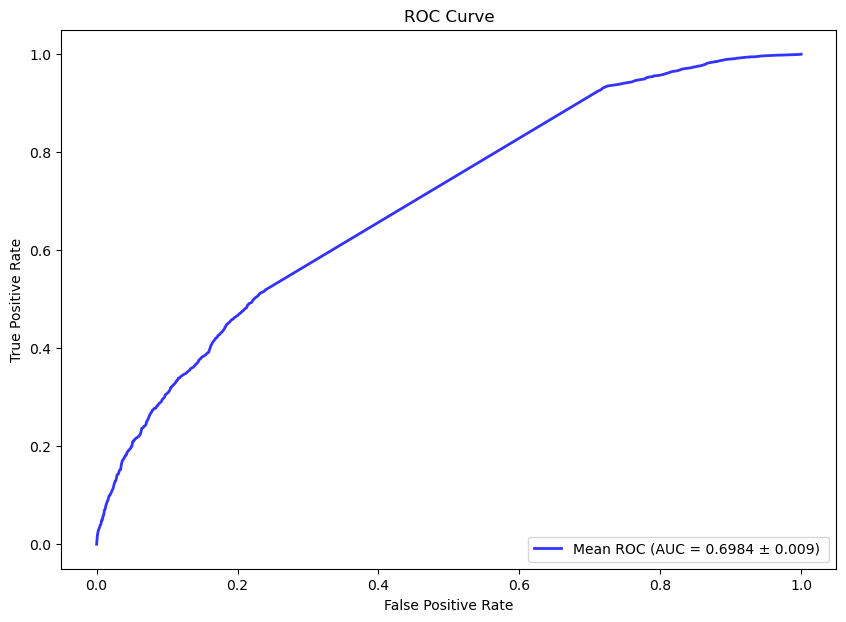

In [33]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
Tf = TfidfVectorizer(ngram_range=(2, 2))
f1_scores = []
random_forest_bigram_aucs = []
precisions = []
recalls = []
tprs = []
fprs = []

all_probabilities = np.empty(len(X))
all_preds = np.empty(len(X))

random_forest_bigram_mean_fpr = np.linspace(0, 1, 1000)
random_forest_bigram_mean_tpr = 0.0

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    
    model = joblib.load(f"Models/bigram_random_forest_fold_{i}.joblib")
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit and transform the training data
    X_train_tfidf = Tf.fit_transform(X_train)

    # Transform the testing data
    X_test_tfidf = Tf.transform(X_test)

    X_train_res, y_train_res = (X_train_tfidf, y_train)

    y_pred_proba = model.predict_proba(X_test_tfidf)
    y_pred = (np.array([subarray[1] for subarray in y_pred_proba]) > 0.5).astype(int)

    auc = roc_auc_score(y_test.values.tolist(), np.array([subarray[1] for subarray in y_pred_proba]))
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    random_forest_bigram_aucs.append(auc)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    fpr, tpr, thresholds = roc_curve(y_test,  np.array([subarray[1] for subarray in y_pred_proba]))
    random_forest_bigram_mean_tpr += np.interp(random_forest_bigram_mean_fpr, fpr, tpr)
    random_forest_bigram_mean_tpr[0] = 0.0
    fprs.append(fpr)
    tprs.append(tpr)
    all_probabilities[test_index] = np.array([subarray[1] for subarray in y_pred_proba])
    all_preds[test_index] = y_pred


random_forest_bigram_mean_tpr /= skf.get_n_splits(X, y)

print(f"F1 Score: {np.mean(f1_scores)}")
print(f"AUC Score: {np.mean(random_forest_bigram_aucs)}")
print(f"Precision Score: {np.mean(precisions)}")
print(f"Recall Score: {np.mean(recalls)}")

print("\nStandard Devations:")
print(f"F1 Score: {np.std(f1_scores)}")
print(f"AUC Score: {np.std(random_forest_bigram_aucs)}")
print(f"Precision Score: {np.std(precisions)}")
print(f"Recall Score: {np.std(recalls)}")

plt.figure(figsize=(10, 7))
plt.plot(random_forest_bigram_mean_fpr, random_forest_bigram_mean_tpr, color='b', label=f'Mean ROC (AUC = {np.round(np.mean(random_forest_bigram_aucs), 4)} ± {np.round(np.std(random_forest_bigram_aucs), 4)}) ', lw=2, alpha=0.8)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

#### MLP

F1 Score: 0.8560385237713278
AUC Score: 0.8614819929393791
Precision Score: 0.7835402532351587
Recall Score: 0.9433769302083215

Standard Devations:
F1 Score: 0.004554378027220649
AUC Score: 0.008463889093117285
Precision Score: 0.006364762746787906
Recall Score: 0.00611030711036808


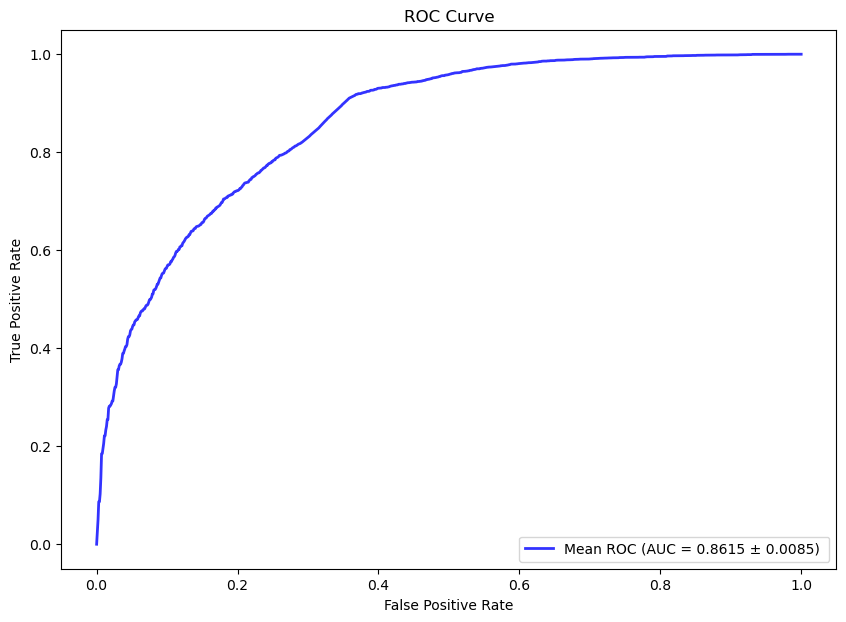

In [34]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
Tf = TfidfVectorizer(ngram_range=(2, 2))
f1_scores = []
mlp_bigram_aucs = []
precisions = []
recalls = []
tprs = []
fprs = []

all_probabilities = np.empty(len(X))
all_preds = np.empty(len(X))

mlp_bigram_mean_fpr = np.linspace(0, 1, 1000)
mlp_bigram_mean_tpr = 0.0

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    
    model = joblib.load(f"Models/bigrams_mlp_fold_{i}.joblib")
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit and transform the training data
    X_train_tfidf = Tf.fit_transform(X_train)

    # Transform the testing data
    X_test_tfidf = Tf.transform(X_test)

    X_train_res, y_train_res = (X_train_tfidf, y_train)

    y_pred_proba = model.predict_proba(X_test_tfidf)
    y_pred = (np.array([subarray[1] for subarray in y_pred_proba]) > 0.5).astype(int)

    auc = roc_auc_score(y_test.values.tolist(), np.array([subarray[1] for subarray in y_pred_proba]))
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    mlp_bigram_aucs.append(auc)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    fpr, tpr, thresholds = roc_curve(y_test,  np.array([subarray[1] for subarray in y_pred_proba]))
    mlp_bigram_mean_tpr += np.interp(mlp_bigram_mean_fpr, fpr, tpr)
    mlp_bigram_mean_tpr[0] = 0.0
    fprs.append(fpr)
    tprs.append(tpr)
    all_probabilities[test_index] = np.array([subarray[1] for subarray in y_pred_proba])
    all_preds[test_index] = y_pred


mlp_bigram_mean_tpr /= skf.get_n_splits(X, y)

print(f"F1 Score: {np.mean(f1_scores)}")
print(f"AUC Score: {np.mean(mlp_bigram_aucs)}")
print(f"Precision Score: {np.mean(precisions)}")
print(f"Recall Score: {np.mean(recalls)}")

print("\nStandard Devations:")
print(f"F1 Score: {np.std(f1_scores)}")
print(f"AUC Score: {np.std(mlp_bigram_aucs)}")
print(f"Precision Score: {np.std(precisions)}")
print(f"Recall Score: {np.std(recalls)}")

plt.figure(figsize=(10, 7))
plt.plot(mlp_bigram_mean_fpr, mlp_bigram_mean_tpr, color='b', label=f'Mean ROC (AUC = {np.round(np.mean(mlp_bigram_aucs), 4)} ± {np.round(np.std(mlp_bigram_aucs), 4)}) ', lw=2, alpha=0.8)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

#### SVM

F1 Score: 0.8799932495406317
AUC Score: 0.899255454243093
Precision Score: 0.8253368177554137
Recall Score: 0.9424212644485002

Standard Devations:
F1 Score: 0.004705562134446574
AUC Score: 0.0073495495704003376
Precision Score: 0.0049793697668255405
Recall Score: 0.005960891046654717


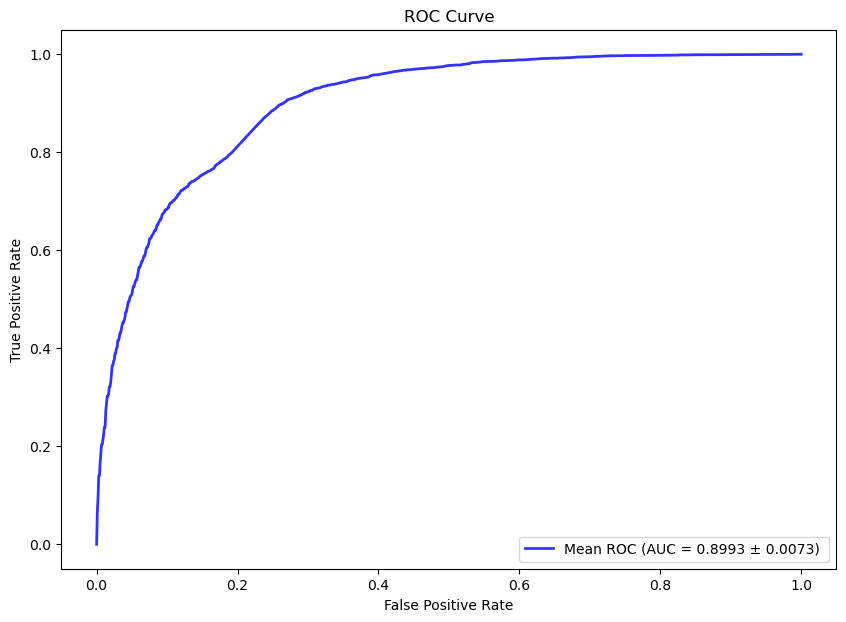

In [35]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
Tf = TfidfVectorizer(ngram_range=(2, 2))
f1_scores = []
svm_bigram_aucs = []
precisions = []
recalls = []
tprs = []
fprs = []

all_probabilities = np.empty(len(X))
all_preds = np.empty(len(X))

svm_bigram_mean_fpr = np.linspace(0, 1, 1000)
svm_bigram_mean_tpr = 0.0

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    
    model = joblib.load(f"Models/bigram_svm_fold_{i}.joblib")
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit and transform the training data
    X_train_tfidf = Tf.fit_transform(X_train)

    # Transform the testing data
    X_test_tfidf = Tf.transform(X_test)
    
    X_train_res, y_train_res = (X_train_tfidf, y_train)

    decision_values = model.decision_function(X_test_tfidf)
    y_pred_proba = 1 / (1 + (1 / (2 ** decision_values)))
    mask = np.array(y_pred_proba) > 0.475
    y_pred = mask.astype(int)

    auc = roc_auc_score(y_test.values.tolist(), y_pred_proba)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    svm_bigram_aucs.append(auc)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    svm_bigram_mean_tpr += np.interp(svm_bigram_mean_fpr, fpr, tpr)
    svm_bigram_mean_tpr[0] = 0.0
    fprs.append(fpr)
    tprs.append(tpr)
    all_probabilities[test_index] = y_pred_proba
    all_preds[test_index] = y_pred


svm_bigram_mean_tpr /= skf.get_n_splits(X, y)

print(f"F1 Score: {np.mean(f1_scores)}")
print(f"AUC Score: {np.mean(svm_bigram_aucs)}")
print(f"Precision Score: {np.mean(precisions)}")
print(f"Recall Score: {np.mean(recalls)}")

print("\nStandard Devations:")
print(f"F1 Score: {np.std(f1_scores)}")
print(f"AUC Score: {np.std(svm_bigram_aucs)}")
print(f"Precision Score: {np.std(precisions)}")
print(f"Recall Score: {np.std(recalls)}")

plt.figure(figsize=(10, 7))
plt.plot(svm_bigram_mean_fpr, svm_bigram_mean_tpr, color='b', label=f'Mean ROC (AUC = {np.round(np.mean(svm_bigram_aucs), 4)} ± {np.round(np.std(svm_bigram_aucs), 4)}) ', lw=2, alpha=0.8)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Unigram and Bigrams

#### Random Forest

F1 Score: 0.8715668429165557
AUC Score: 0.8962194953195224
Precision Score: 0.8864193328170543
Recall Score: 0.8573219857510186

Standard Devations:
F1 Score: 0.011066970354842333
AUC Score: 0.014013981175967633
Precision Score: 0.01105833222687558
Recall Score: 0.015035989244460823


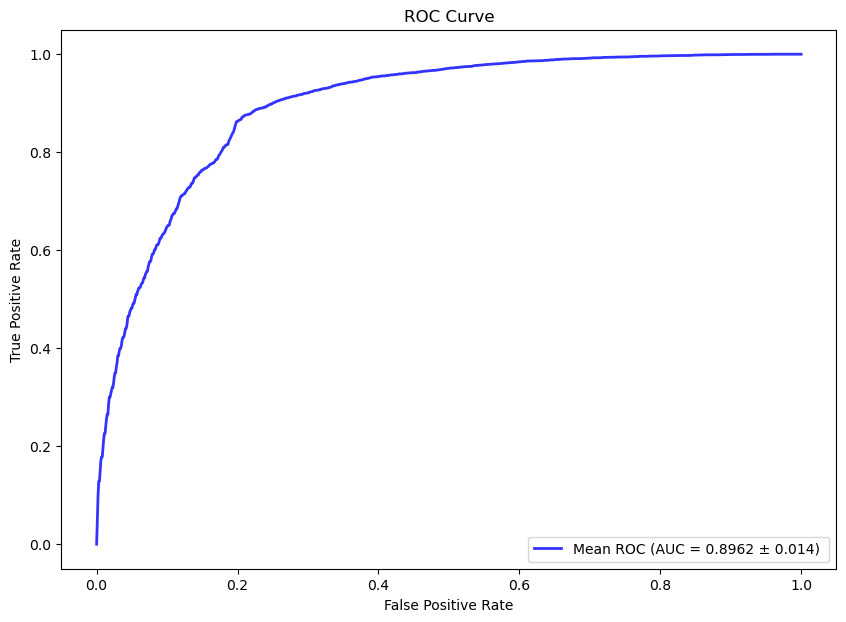

In [36]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
Tf = TfidfVectorizer(ngram_range=(1, 2))
f1_scores = []
random_forest_uni_bigram_aucs = []
precisions = []
recalls = []
tprs = []
fprs = []

all_probabilities = np.empty(len(X))
all_preds = np.empty(len(X))

random_forest_uni_bi_mean_fpr = np.linspace(0, 1, 1000)
random_forest_uni_bi_mean_tpr = 0.0

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    
    model = joblib.load(f"Models/uni_bigrams_random_forest_fold_{i}.joblib")
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit and transform the training data
    X_train_tfidf = Tf.fit_transform(X_train)

    # Transform the testing data
    X_test_tfidf = Tf.transform(X_test)


    X_train_res, y_train_res = (X_train_tfidf, y_train)

    y_pred_proba = model.predict_proba(X_test_tfidf)
    y_pred = (np.array([subarray[1] for subarray in y_pred_proba]) > 0.5).astype(int)

    auc = roc_auc_score(y_test.values.tolist(), np.array([subarray[1] for subarray in y_pred_proba]))
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    random_forest_uni_bigram_aucs.append(auc)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    fpr, tpr, thresholds = roc_curve(y_test,  np.array([subarray[1] for subarray in y_pred_proba]))
    random_forest_uni_bi_mean_tpr += np.interp(random_forest_uni_bi_mean_fpr, fpr, tpr)
    random_forest_uni_bi_mean_tpr[0] = 0.0
    fprs.append(fpr)
    tprs.append(tpr)
    all_probabilities[test_index] = np.array([subarray[1] for subarray in y_pred_proba])
    all_preds[test_index] = y_pred


random_forest_uni_bi_mean_tpr /= skf.get_n_splits(X, y)

print(f"F1 Score: {np.mean(f1_scores)}")
print(f"AUC Score: {np.mean(random_forest_uni_bigram_aucs)}")
print(f"Precision Score: {np.mean(precisions)}")
print(f"Recall Score: {np.mean(recalls)}")

print("\nStandard Devations:")
print(f"F1 Score: {np.std(f1_scores)}")
print(f"AUC Score: {np.std(random_forest_uni_bigram_aucs)}")
print(f"Precision Score: {np.std(precisions)}")
print(f"Recall Score: {np.std(recalls)}")

plt.figure(figsize=(10, 7))
plt.plot(random_forest_uni_bi_mean_fpr, random_forest_uni_bi_mean_tpr, color='b', label=f'Mean ROC (AUC = {np.round(np.mean(random_forest_uni_bigram_aucs), 4)} ± {np.round(np.std(random_forest_uni_bigram_aucs), 4)}) ', lw=2, alpha=0.8)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

#### MLP

F1 Score: 0.9128173698891737
AUC Score: 0.9435820315788659
Precision Score: 0.8776026069723774
Recall Score: 0.9510103673798745

Standard Devations:
F1 Score: 0.002669166541796205
AUC Score: 0.004855533192806016
Precision Score: 0.0028870610863693026
Recall Score: 0.006150894652520174


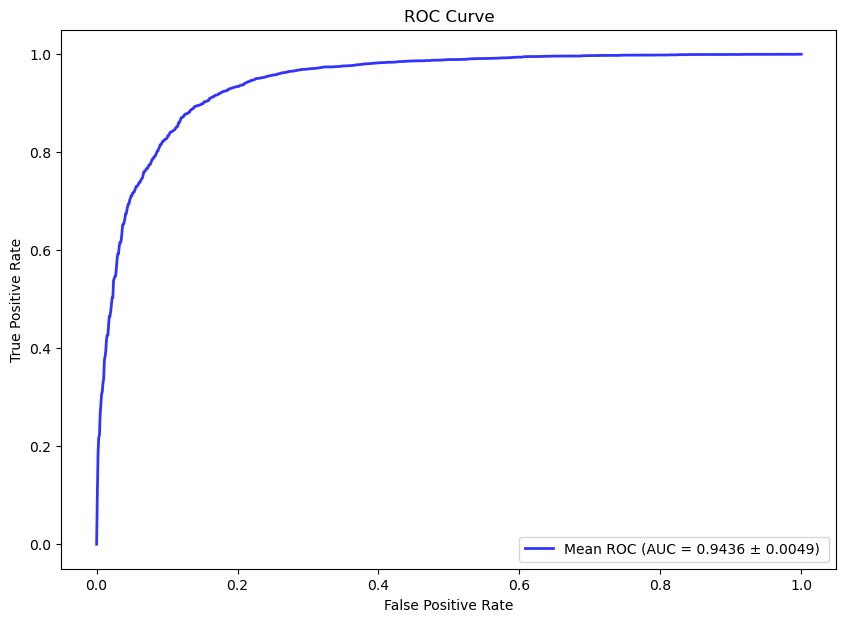

In [37]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
Tf = TfidfVectorizer(ngram_range=(1, 2))
f1_scores = []
mlp_uni_bigram_aucs = []
precisions = []
recalls = []
tprs = []
fprs = []

all_probabilities = np.empty(len(X))
all_preds = np.empty(len(X))

mlp_uni_bigram_mean_fpr = np.linspace(0, 1, 1000)
mlp_uni_bigram_mean_tpr = 0.0

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    
    model = joblib.load(f"Models/uni_bigrams_mlp_fold_{i}.joblib")
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit and transform the training data
    X_train_tfidf = Tf.fit_transform(X_train)

    # Transform the testing data
    X_test_tfidf = Tf.transform(X_test)

    X_train_res, y_train_res = (X_train_tfidf, y_train)

    y_pred_proba = model.predict_proba(X_test_tfidf)
    y_pred = (np.array([subarray[1] for subarray in y_pred_proba]) > 0.4).astype(int)

    auc = roc_auc_score(y_test.values.tolist(), np.array([subarray[1] for subarray in y_pred_proba]))
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    mlp_uni_bigram_aucs.append(auc)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    fpr, tpr, thresholds = roc_curve(y_test,  np.array([subarray[1] for subarray in y_pred_proba]))
    mlp_uni_bigram_mean_tpr += np.interp(mlp_uni_bigram_mean_fpr, fpr, tpr)
    mlp_uni_bigram_mean_tpr[0] = 0.0
    fprs.append(fpr)
    tprs.append(tpr)
    all_probabilities[test_index] = np.array([subarray[1] for subarray in y_pred_proba])
    all_preds[test_index] = y_pred


mlp_uni_bigram_mean_tpr /= skf.get_n_splits(X, y)

print(f"F1 Score: {np.mean(f1_scores)}")
print(f"AUC Score: {np.mean(mlp_uni_bigram_aucs)}")
print(f"Precision Score: {np.mean(precisions)}")
print(f"Recall Score: {np.mean(recalls)}")

print("\nStandard Devations:")
print(f"F1 Score: {np.std(f1_scores)}")
print(f"AUC Score: {np.std(mlp_uni_bigram_aucs)}")
print(f"Precision Score: {np.std(precisions)}")
print(f"Recall Score: {np.std(recalls)}")

plt.figure(figsize=(10, 7))
plt.plot(mlp_uni_bigram_mean_fpr, mlp_uni_bigram_mean_tpr, color='b', label=f'Mean ROC (AUC = {np.round(np.mean(mlp_uni_bigram_aucs), 4)} ± {np.round(np.std(mlp_uni_bigram_aucs), 4)}) ', lw=2, alpha=0.8)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

#### SVM

F1 Score: 0.9161919871949393
AUC Score: 0.9448344746277104
Precision Score: 0.896020591237507
Recall Score: 0.9373328122450684

Standard Devations:
F1 Score: 0.0032731216688060504
AUC Score: 0.003547119933604531
Precision Score: 0.003493252962018553
Recall Score: 0.00685100624428894


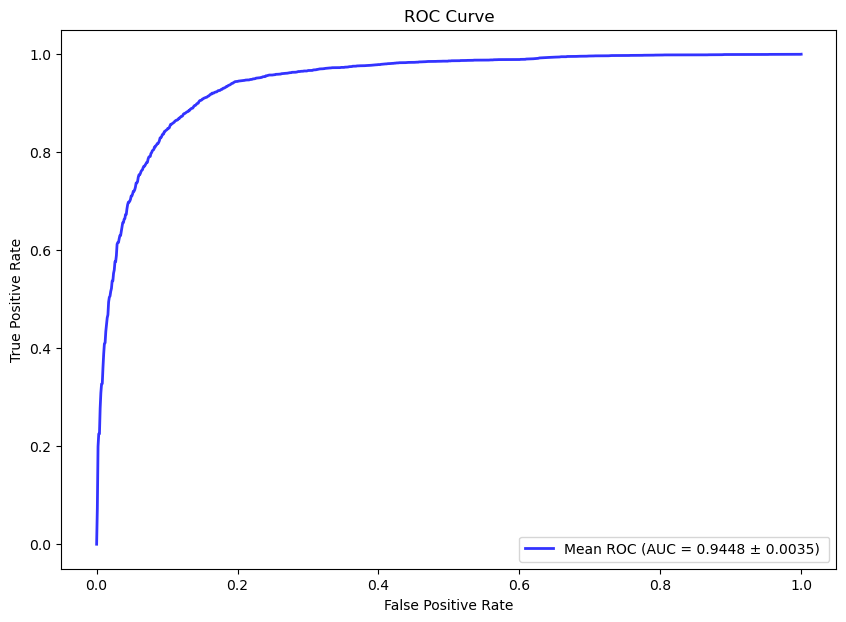

In [38]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
Tf = TfidfVectorizer(ngram_range=(1, 1))
f1_scores = []
svm_uni_bigram_aucs = []
precisions = []
recalls = []
tprs = []
fprs = []

all_probabilities = np.empty(len(X))
all_preds = np.empty(len(X))

svm_uni_bigram_mean_fpr = np.linspace(0, 1, 1000)
svm_uni_bigram_mean_tpr = 0.0

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    
    model = joblib.load(f"Models/svm_fold_{i}.joblib")
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit and transform the training data
    X_train_tfidf = Tf.fit_transform(X_train)

    # Transform the testing data
    X_test_tfidf = Tf.transform(X_test)

    X_train_res, y_train_res = (X_train_tfidf, y_train)

    decision_values = model.decision_function(X_test_tfidf)
    y_pred_proba = 1 / (1 + (1 / (2 ** decision_values)))
    mask = np.array(y_pred_proba) > 0.4875
    y_pred = mask.astype(int)

    auc = roc_auc_score(y_test.values.tolist(), y_pred_proba)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    svm_uni_bigram_aucs.append(auc)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    svm_uni_bigram_mean_tpr += np.interp(svm_uni_bigram_mean_fpr, fpr, tpr)
    svm_uni_bigram_mean_tpr[0] = 0.0
    fprs.append(fpr)
    tprs.append(tpr)
    all_probabilities[test_index] = y_pred_proba
    all_preds[test_index] = y_pred


svm_uni_bigram_mean_tpr /= skf.get_n_splits(X, y)

print(f"F1 Score: {np.mean(f1_scores)}")
print(f"AUC Score: {np.mean(svm_uni_bigram_aucs)}")
print(f"Precision Score: {np.mean(precisions)}")
print(f"Recall Score: {np.mean(recalls)}")

print("\nStandard Devations:")
print(f"F1 Score: {np.std(f1_scores)}")
print(f"AUC Score: {np.std(svm_uni_bigram_aucs)}")
print(f"Precision Score: {np.std(precisions)}")
print(f"Recall Score: {np.std(recalls)}")

plt.figure(figsize=(10, 7))
plt.plot(svm_uni_bigram_mean_fpr, svm_uni_bigram_mean_tpr, color='b', label=f'Mean ROC (AUC = {np.round(np.mean(svm_uni_bigram_aucs), 4)} ± {np.round(np.std(svm_uni_bigram_aucs), 4)}) ', lw=2, alpha=0.8)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Plotting all the ROC Curves

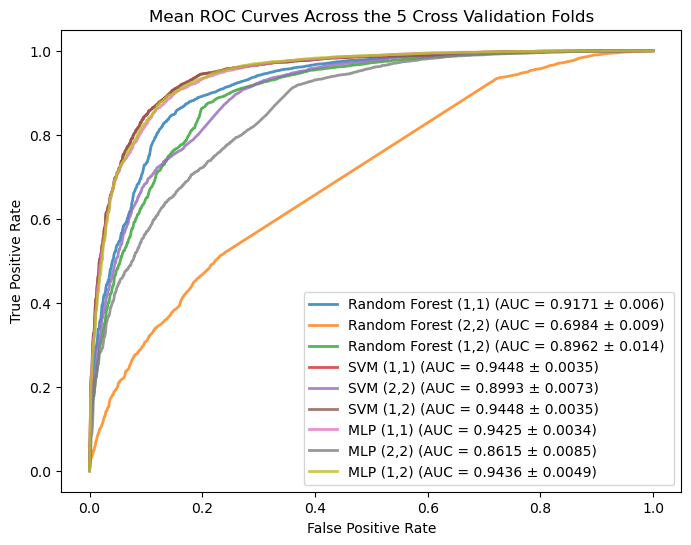

In [44]:
plt.figure(figsize=(8, 6))

plt.plot(random_forest_uni_mean_fpr, random_forest_uni_mean_tpr, label=f'Random Forest (1,1) (AUC = {np.round(np.mean(random_forest_uni_aucs), 4)} ± {np.round(np.std(random_forest_uni_aucs), 4)}) ', lw=2, alpha=0.8)
plt.plot(random_forest_bigram_mean_fpr, random_forest_bigram_mean_tpr, label=f'Random Forest (2,2) (AUC = {np.round(np.mean(random_forest_bigram_aucs), 4)} ± {np.round(np.std(random_forest_bigram_aucs), 4)}) ', lw=2, alpha=0.8)
plt.plot(random_forest_uni_bi_mean_fpr, random_forest_uni_bi_mean_tpr, label=f'Random Forest (1,2) (AUC = {np.round(np.mean(random_forest_uni_bigram_aucs), 4)} ± {np.round(np.std(random_forest_uni_bigram_aucs), 4)}) ', lw=2, alpha=0.8)

plt.plot(svm_uni_mean_fpr, svm_uni_mean_tpr, label=f'SVM (1,1) (AUC = {np.round(np.mean(svm_uni_aucs), 4)} ± {np.round(np.std(svm_uni_aucs), 4)}) ', lw=2, alpha=0.8)
plt.plot(svm_bigram_mean_fpr, svm_bigram_mean_tpr, label=f'SVM (2,2) (AUC = {np.round(np.mean(svm_bigram_aucs), 4)} ± {np.round(np.std(svm_bigram_aucs), 4)}) ', lw=2, alpha=0.8)
plt.plot(svm_uni_bigram_mean_fpr, svm_uni_bigram_mean_tpr, label=f'SVM (1,2) (AUC = {np.round(np.mean(svm_uni_bigram_aucs), 4)} ± {np.round(np.std(svm_uni_bigram_aucs), 4)}) ', lw=2, alpha=0.8)

plt.plot(mlp_uni_mean_fpr, mlp_uni_mean_tpr, label=f'MLP (1,1) (AUC = {np.round(np.mean(mlp_uni_aucs_aucs), 4)} ± {np.round(np.std(mlp_uni_aucs_aucs), 4)}) ', lw=2, alpha=0.8)
plt.plot(mlp_bigram_mean_fpr, mlp_bigram_mean_tpr, label=f'MLP (2,2) (AUC = {np.round(np.mean(mlp_bigram_aucs), 4)} ± {np.round(np.std(mlp_bigram_aucs), 4)}) ', lw=2, alpha=0.8)
plt.plot(mlp_uni_bigram_mean_fpr, mlp_uni_bigram_mean_tpr, label=f'MLP (1,2) (AUC = {np.round(np.mean(mlp_uni_bigram_aucs), 4)} ± {np.round(np.std(mlp_uni_bigram_aucs), 4)}) ', lw=2, alpha=0.8)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean ROC Curves Across the 5 Cross Validation Folds')
plt.legend(loc="lower right")
plt.show()